# Exploratory Data Analysis
### Signal EDA

Visualize class differences in the voltage, current and power waveforms constructed from the input data

* Due to the size of the data (~80K rows, ~140 features, 80+MB), data was randomly sampled to reduce its size and fit into memory (load_data.PreProcessing)
* Other exploration of the data distribution may be found on multi_class_EDA

### Dependencies

In [1]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data
import data.signal_processing as s

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import re
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [2]:
random_seed = int(os.getenv('RANDOM_SEED'))

# Load Data

In [3]:
# csv_file = load_data.combined_csv
csv_file = load_data.combined_sample_csv

wave_df = load_data.load_from_csv(csv_file)

pd.set_option('display.max_columns', wave_df.shape[1])
pd.set_option('display.max_rows', wave_df.shape[0])

dp = load_data.DataPreprocessor(wave_df)

(25944, 232)


# Signal Visualization

**What does an event actually look like?**

Wave form representing real time signal: $$x(t) = X_m\cos(\omega t + \phi)$$

Where $X_m$ is the magnitude, $\omega$ is $2\pi$ times the frequency, and $\phi$ is the angle. This is valid for voltage and current.

In synchrophasor notation, the magnitude is not given directly. It is typically reported as RMS value, which is based on the integral of the waveform and simplified to $\frac{X_{max}}{\sqrt{2}}$.

Power can also be shown as a waveform; it is the product of voltage and current.
$$p(t) = v(t) \times i(t)$$

### Compare Voltage, Power, Current for One Sample

In [4]:
# pick 1 sample
choice = wave_df['sample_id'].min() # known "no event"
sample_df = wave_df.loc[wave_df['sample_id'] == choice,:]
sample_class = sample_df['scenario_class'].unique()[0]

# lets just look at one phase from R1 sensor
R1_A_cols = [i for i in dp.waves if 'R1' in i and '_A_' in i and '_pos_neg_zero' not in i]
print(choice, sample_class, R1_A_cols, sample_df.shape)

15795 no event ['R1_Phase_A_voltage_wave', 'R1_Phase_A_current_wave', 'R1_Phase_A_power_wave'] (173, 232)


Using matplotlib backend: module://matplotlib_inline.backend_inline


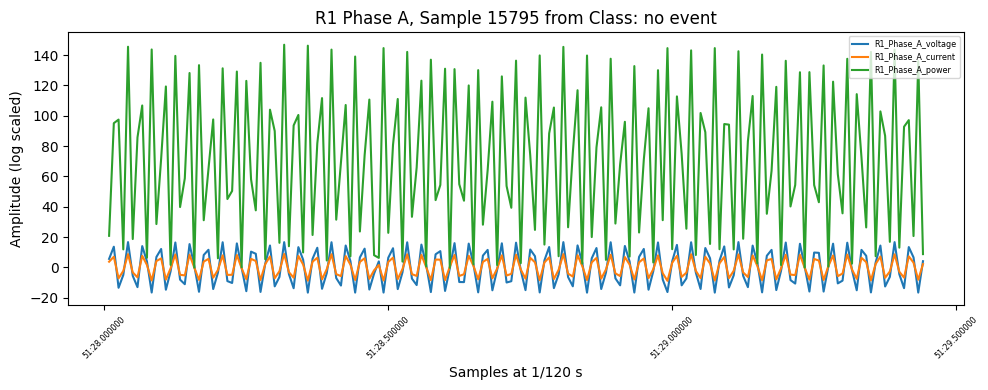

In [5]:
%matplotlib

plt.figure(figsize=(10,4))

for col in sample_df[R1_A_cols]:
    label = re.sub(r'_wave$','',col)
    plt.plot(sample_df['synthetic_datetime'],sample_df[col],label=label)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 Phase A, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

### Compare A,B,C Phases

In [6]:
R1_all_phase_cols = [i for i in dp.R1_features if 'wave' in i and 'pos_neg_zero' not in i]
R1_all_phase_cols

['R1_Phase_A_voltage_wave',
 'R1_Phase_A_current_wave',
 'R1_Phase_A_power_wave',
 'R1_Phase_B_voltage_wave',
 'R1_Phase_B_current_wave',
 'R1_Phase_B_power_wave',
 'R1_Phase_C_voltage_wave',
 'R1_Phase_C_current_wave',
 'R1_Phase_C_power_wave']

Using matplotlib backend: module://matplotlib_inline.backend_inline


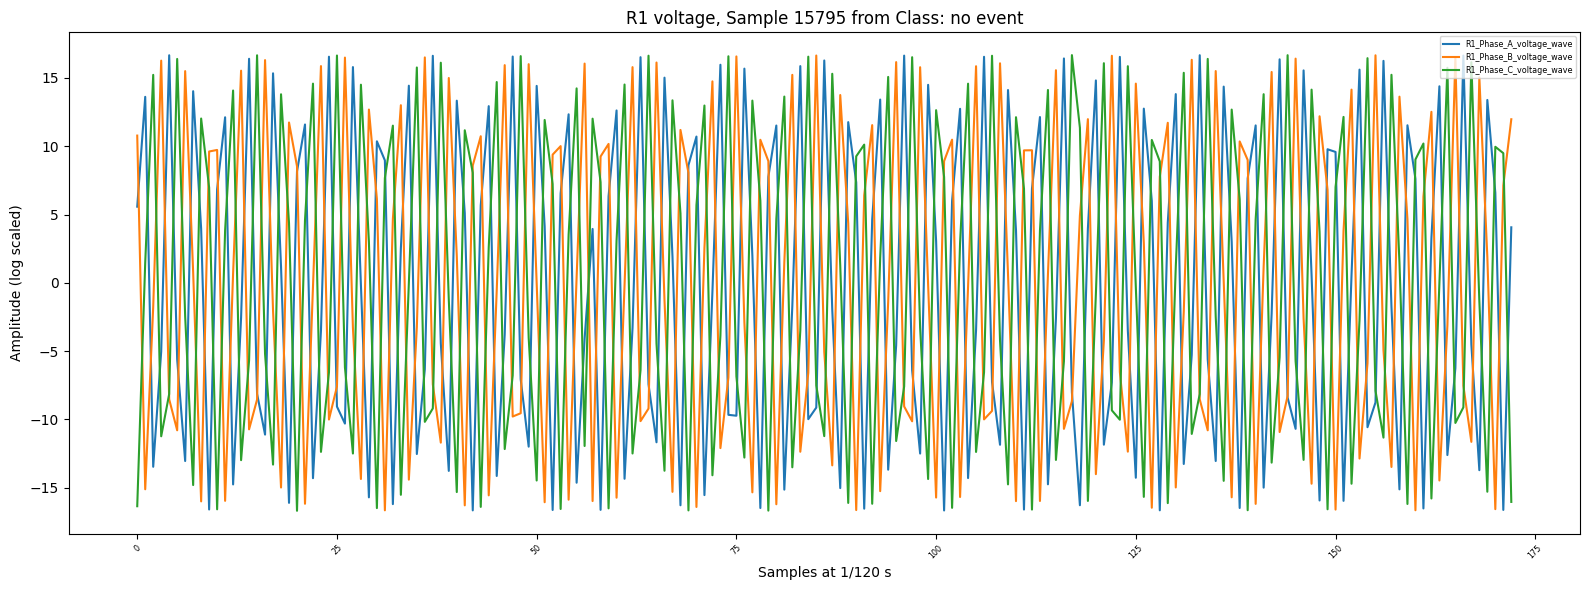

In [7]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'voltage'
for col in R1_all_phase_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


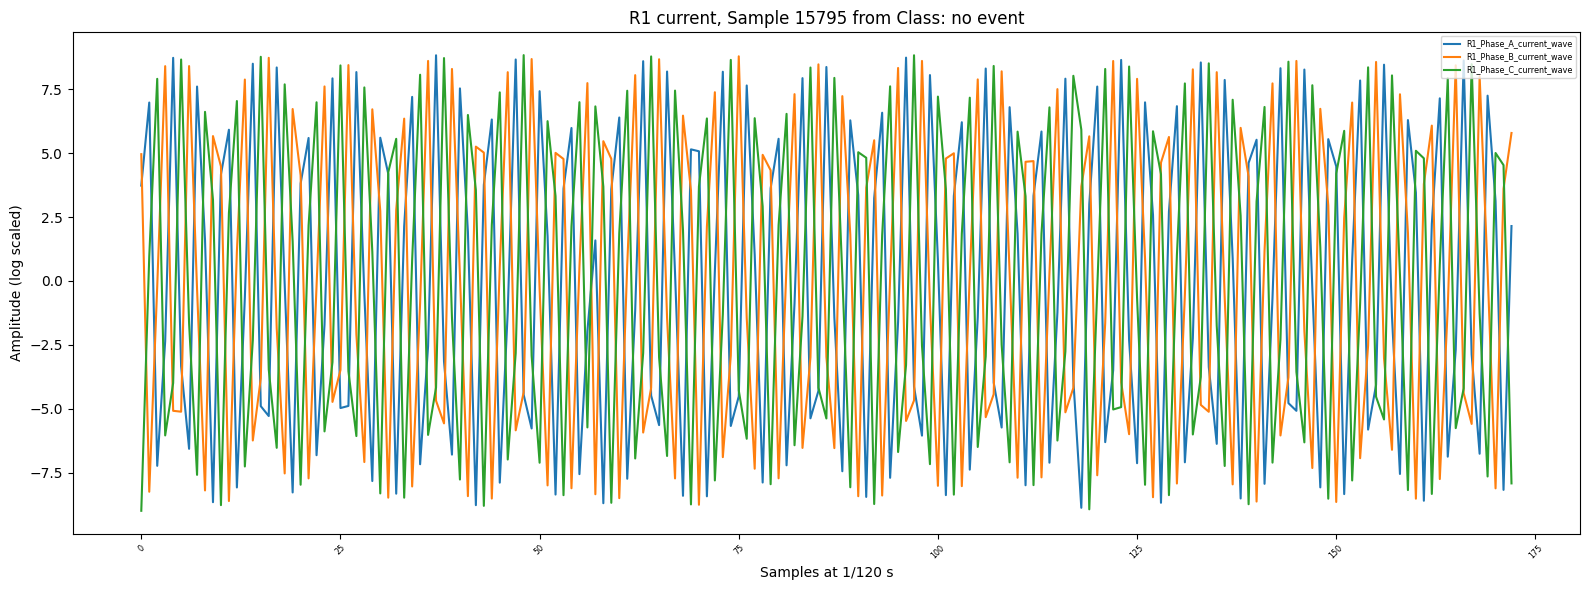

In [8]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'current'
for col in R1_all_phase_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


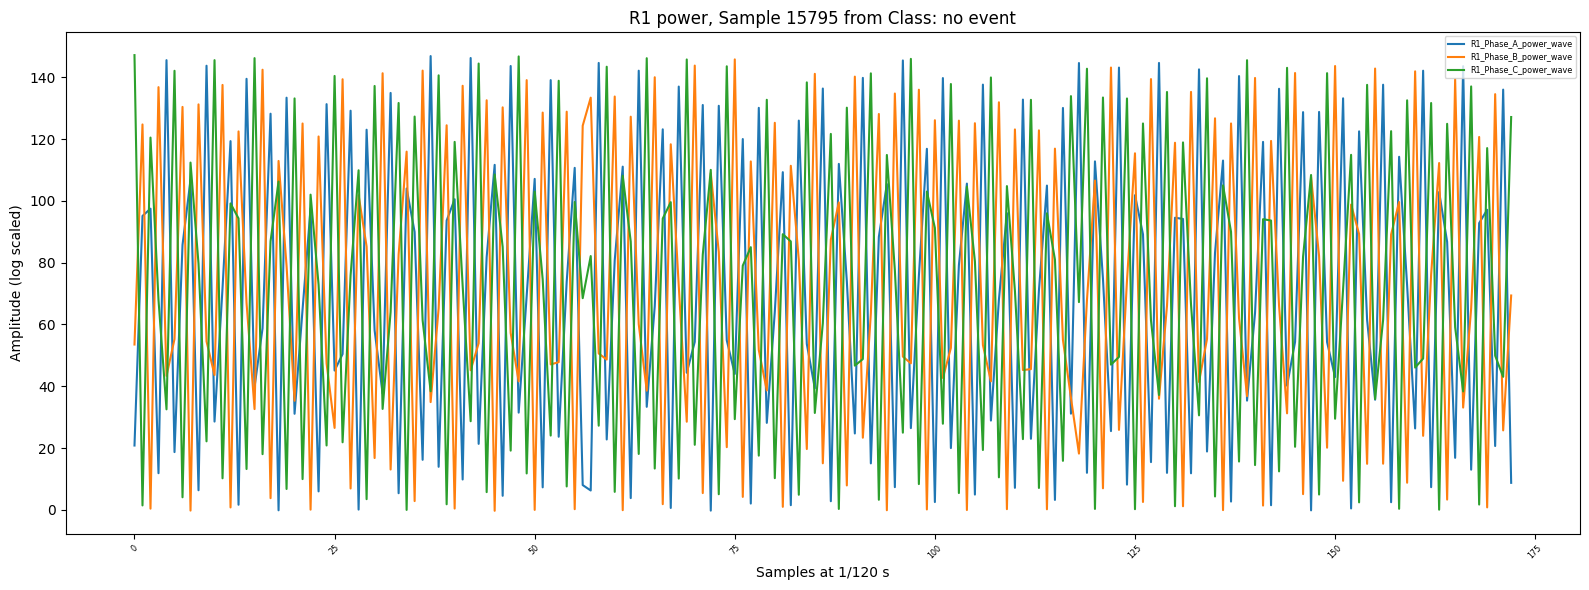

In [9]:
%matplotlib
plt.figure(figsize=(16,6))

filt = 'power'
for col in R1_all_phase_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

### Compare Pos Neg Zero vs AC Wave

* perfect overlay

In [10]:
R1_A_posneg_cols = [i for i in dp.R1_features if 'wave' in i and 'A' in i]

Using matplotlib backend: module://matplotlib_inline.backend_inline


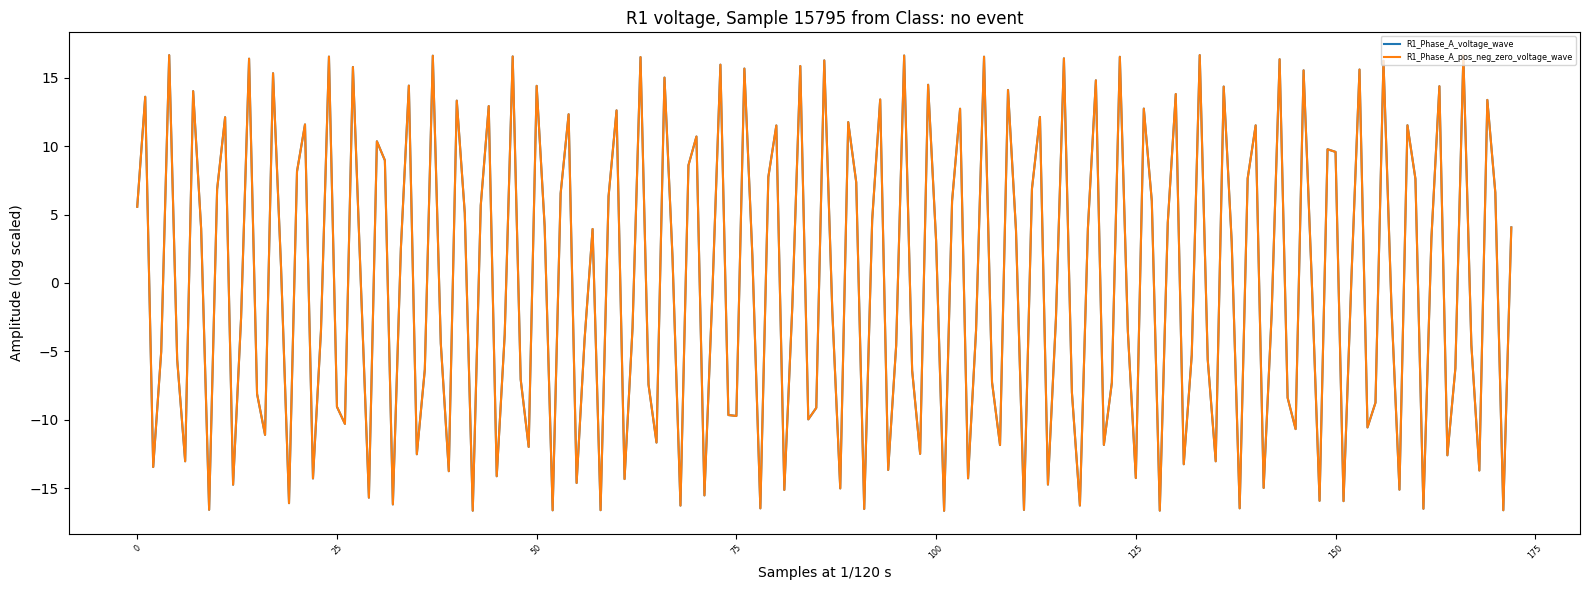

In [11]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'voltage'
for col in R1_A_posneg_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


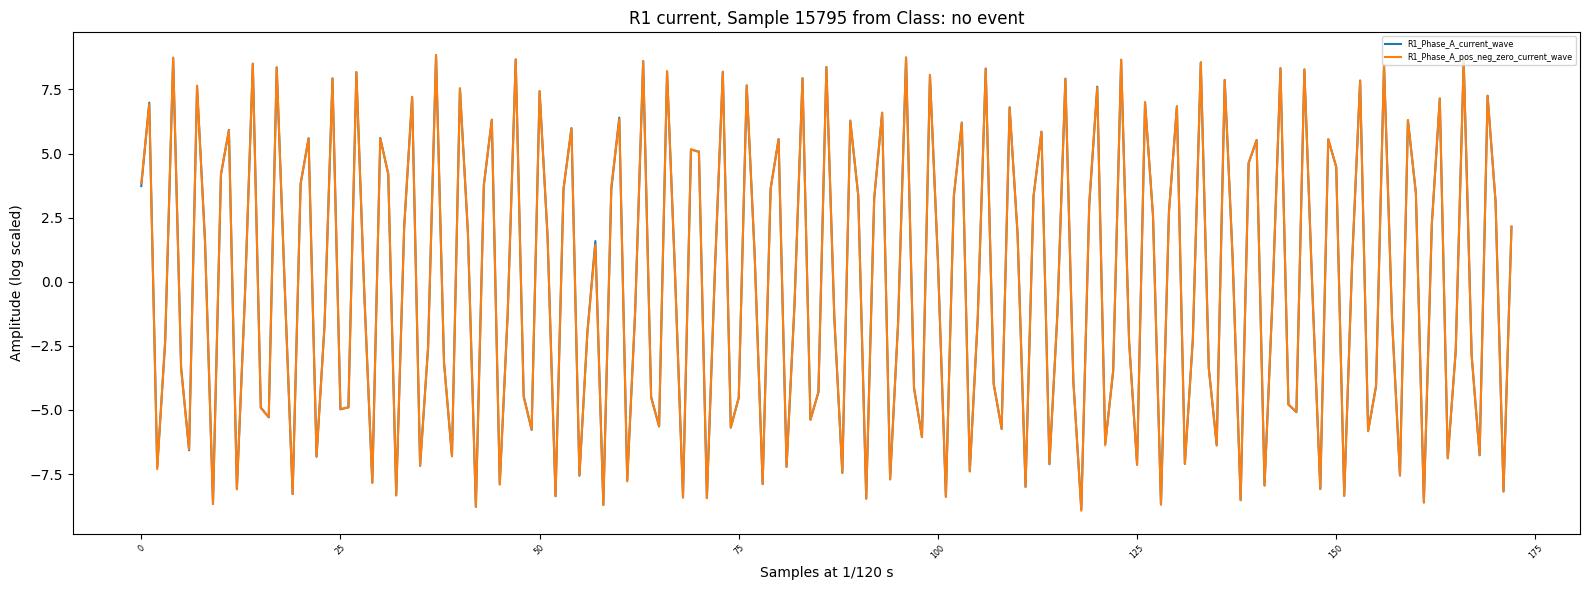

In [12]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'current'
for col in R1_A_posneg_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


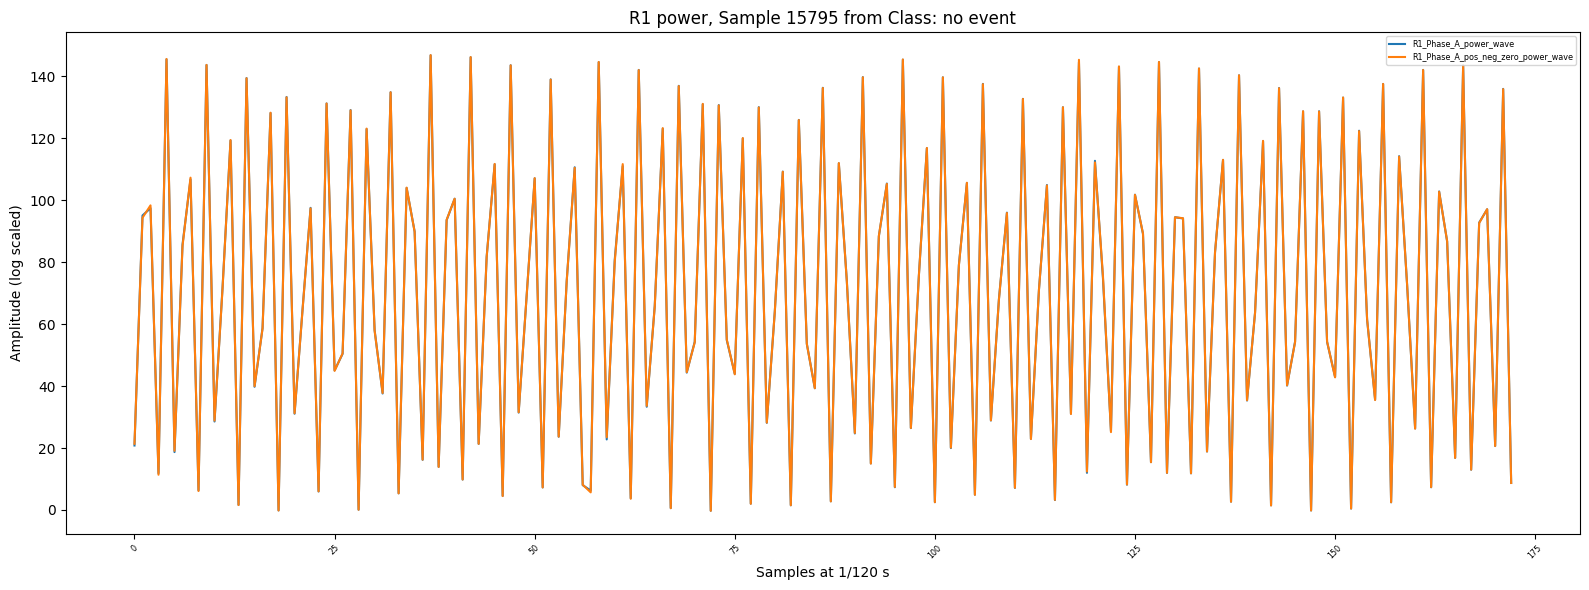

In [13]:
%matplotlib

plt.figure(figsize=(16,6))

filt = 'power'
for col in R1_A_posneg_cols:
    
    if filt in col:
        label = re.sub(r'_wave$','',col)
        plt.plot(sample_df[col],label=col)

plt.ylabel('Amplitude (log scaled)')
plt.xlabel('Samples at 1/120 s')
plt.xticks(rotation=45,fontsize='xx-small')
plt.title(f'R1 {filt}, Sample {choice} from Class: {sample_class}')
plt.legend(loc='upper right',fontsize='xx-small')
plt.tight_layout()
plt.show()

### Compare Waves by Class: Attack/No Attack

Using matplotlib backend: module://matplotlib_inline.backend_inline
16317 16334
{np.int64(16317): 'Fault from 10-49% on L1 with R1 and R2 disabled & fault', np.int64(16334): 'L2 line maintenance'}


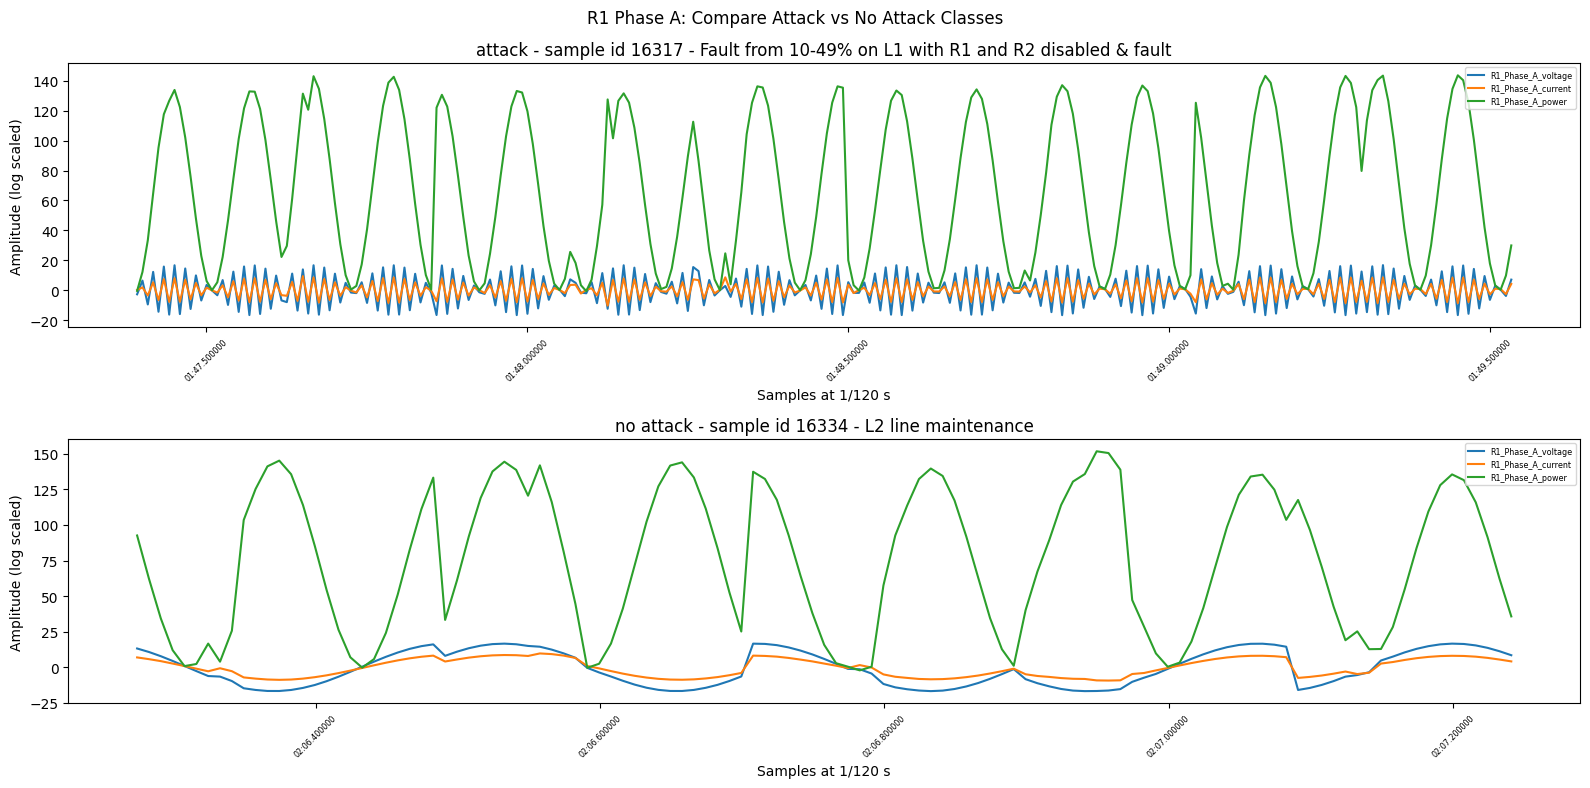

In [14]:
%matplotlib

# CHOOSE A RANDOM SAMPLE FROM EACH CLASS
attack_ids = wave_df.loc[wave_df['is_attack']=='attack','sample_id'].unique()
no_attack_ids = wave_df.loc[wave_df['is_attack']=='not attack','sample_id'].unique()
attack_choice, no_attack_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0]
print(attack_choice, no_attack_choice)

# GET DATA FOR EACH SAMPLE
attack_df, no_attack_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:]
event_detail = {i: wave_df.loc[wave_df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice]}
print(event_detail)

# PLOT, ITERATE BY CLASS
title = 'R1 Phase A: Compare Attack vs No Attack Classes'
class_dfs = [attack_df, no_attack_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}', \
                f'no attack - sample id {no_attack_choice} - {event_detail[no_attack_choice]}' ]
                
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 8))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        label = re.sub(r'_wave$','',col)
        ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
        ax[i].set_ylabel('Amplitude (log scaled)')
        ax[i].set_xlabel('Samples at 1/120 s')
        ax[i].tick_params(axis='x', labelrotation=45, labelsize='xx-small')
        ax[i].set_title(class_names[i])
        ax[i].legend(loc='upper right',fontsize='xx-small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

### Compare Waves by Class: Attack/Natural/No Event

In [15]:
wave_df['scenario_class'].unique()

array(['no event', 'attack', 'natural'], dtype=object)

Using matplotlib backend: module://matplotlib_inline.backend_inline


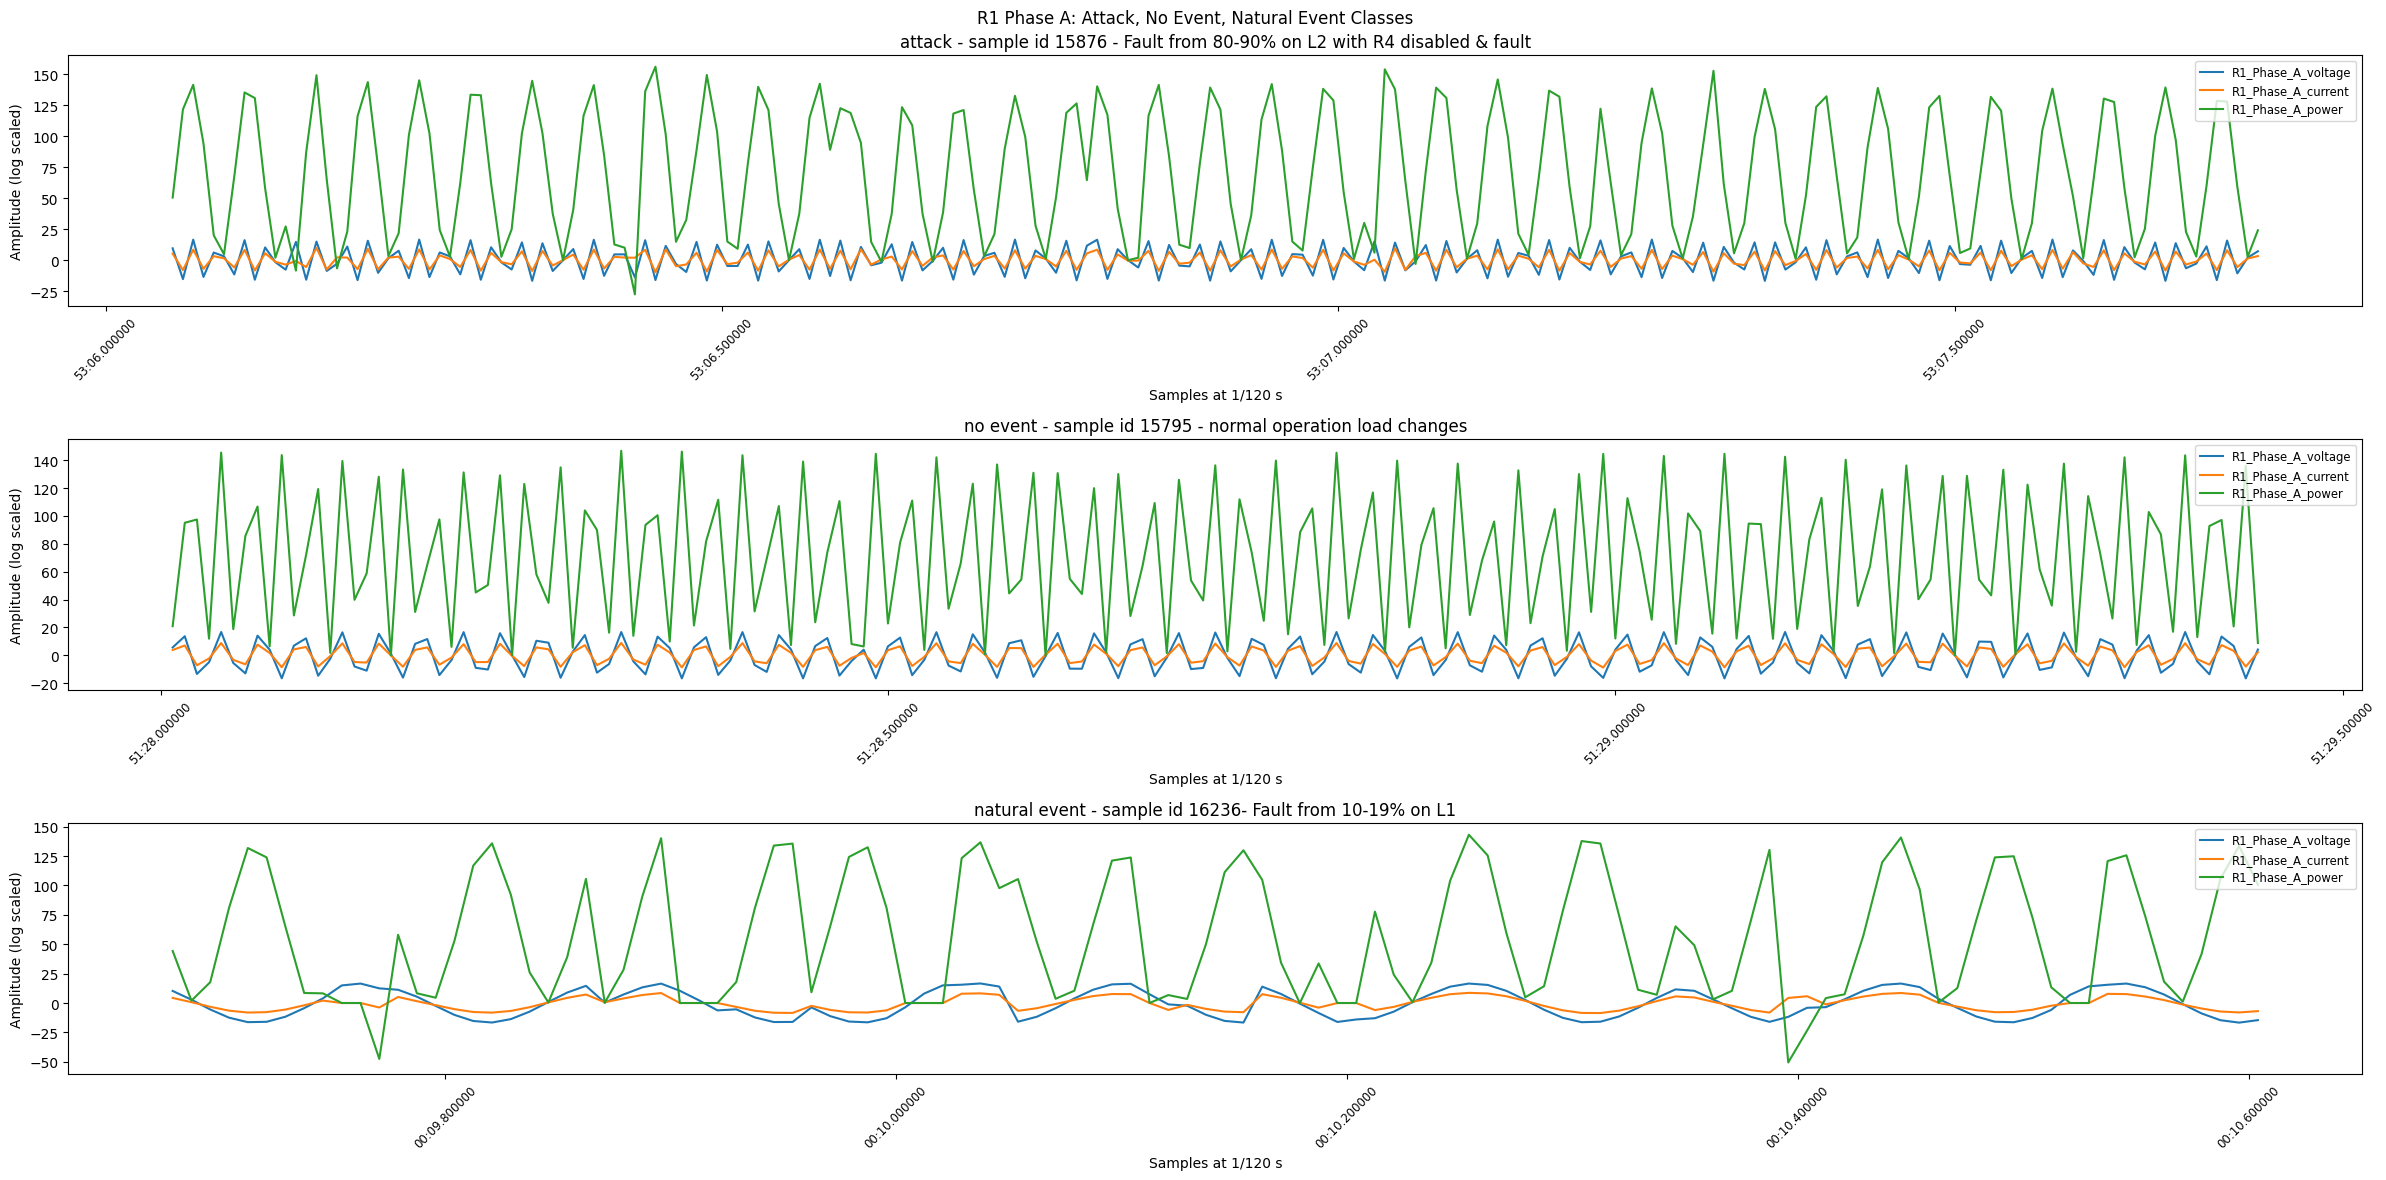

In [16]:
%matplotlib

# CHOOSE A RANDOM SAMPLE FROM EACH CLASS
attack_ids = wave_df.loc[wave_df['scenario_class']=='attack','sample_id'].unique()
no_attack_ids = wave_df.loc[wave_df['scenario_class']=='no event','sample_id'].unique()
natural_ids = wave_df.loc[wave_df['scenario_class']=='natural','sample_id'].unique()
attack_choice, no_attack_choice, natural_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0], np.random.choice(natural_ids,1)[0]

# GET DATA FOR EACH SAMPLE
attack_wave_df, no_attack_wave_df, natural_wave_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:], wave_df.loc[wave_df['sample_id']==natural_choice,:]
event_detail = {i: wave_df.loc[wave_df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice, natural_choice]}

# PLOT, ITERATE BY CLASS
title = 'R1 Phase A: Attack, No Event, Natural Event Classes'
class_dfs = [attack_wave_df, no_attack_wave_df, natural_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}',      \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}', \
                f'natural event - sample id {natural_choice}- {event_detail[natural_choice]}' ]

fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        label = re.sub(r'_wave$','',col)
        ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
        ax[i].set_ylabel('Amplitude (log scaled)')
        ax[i].set_xlabel('Samples at 1/120 s')
        ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
        ax[i].set_title(class_names[i])
        ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

### Compare AC / PosNegZero Waves by Class: Attack/Natural/No Event
AC / PosNegZero waves are still a nearly perfect overlay, even when under attack. So PosNegZero feature isn't going to add a lot during training.

Using matplotlib backend: module://matplotlib_inline.backend_inline


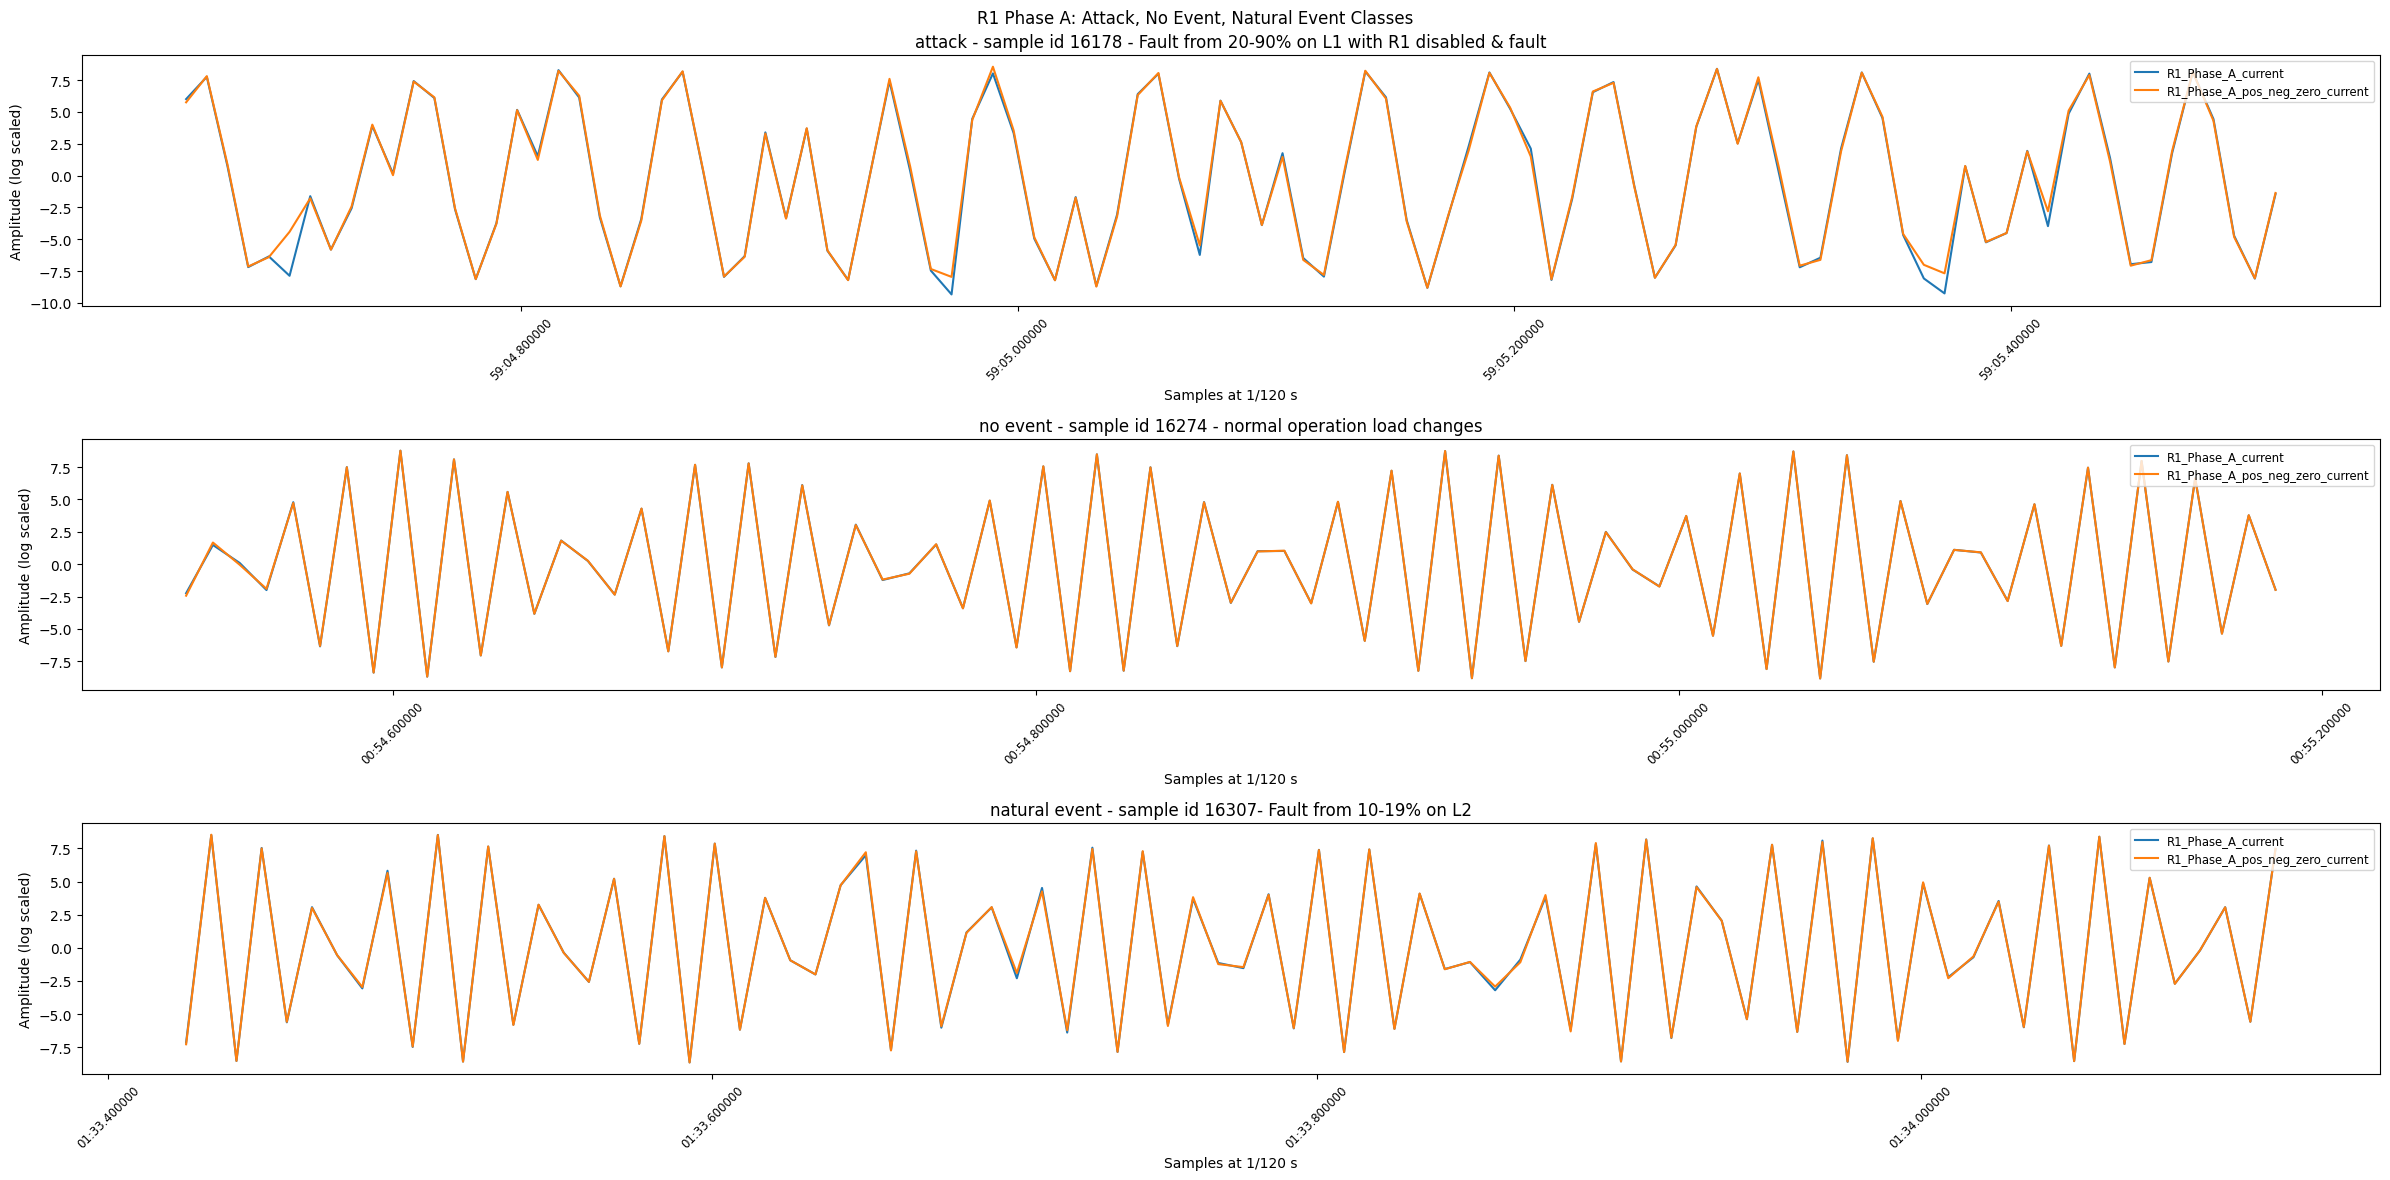

In [17]:
%matplotlib

# CHOOSE A RANDOM SAMPLE FROM EACH CLASS
attack_ids = wave_df.loc[wave_df['scenario_class']=='attack','sample_id'].unique()
no_attack_ids = wave_df.loc[wave_df['scenario_class']=='no event','sample_id'].unique()
natural_ids = wave_df.loc[wave_df['scenario_class']=='natural','sample_id'].unique()
attack_choice, no_attack_choice, natural_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0], np.random.choice(natural_ids,1)[0]

# GET DATA FOR EACH SAMPLE
attack_wave_df, no_attack_wave_df, natural_wave_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:], wave_df.loc[wave_df['sample_id']==natural_choice,:]
event_detail = {i: wave_df.loc[wave_df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice, natural_choice]}

# PLOT, ITERATE BY CLASS
title = 'R1 Phase A: Attack, No Event, Natural Event Classes'
class_dfs = [attack_wave_df, no_attack_wave_df, natural_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}',      \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}', \
                f'natural event - sample id {natural_choice}- {event_detail[natural_choice]}' ]

fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

filt = 'current'
for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_posneg_cols:
        if filt in col.lower():
            label = re.sub(r'_wave$','',col)
            ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

# Signal Descriptive EDA - IQR

In [23]:
# plot waveform with mean, IQR range by class
%matplotlib

# CHOOSE A RANDOM SAMPLE FOR EACH CLASS
attack_ids = wave_df.loc[wave_df['scenario_class']=='attack','sample_id'].unique()
no_attack_ids = wave_df.loc[wave_df['scenario_class']=='no event','sample_id'].unique()
natural_ids = wave_df.loc[wave_df['scenario_class']=='natural','sample_id'].unique()
attack_choice, no_attack_choice, natural_choice = np.random.choice(attack_ids,1)[0], np.random.choice(no_attack_ids,1)[0], np.random.choice(natural_ids,1)[0]

# GET DATA FOR EACH SAMPLE
attack_df, no_attack_df, natural_df = wave_df.loc[wave_df['sample_id']==attack_choice,:], wave_df.loc[wave_df['sample_id']==no_attack_choice,:], wave_df.loc[wave_df['sample_id']==natural_choice,:]
event_detail = {i: wave_df.loc[wave_df['sample_id']==i,'scenario_type'].unique()[0] for i in [attack_choice, no_attack_choice, natural_choice]}

# PLOT ATTRIBUTES
title = 'R1 Phase A: Compare Attack, No Event, Natural Event Classes'
class_dfs = [attack_wave_df, no_attack_wave_df, natural_wave_df]
class_names = [ f'attack - sample id {attack_choice} - {event_detail[attack_choice]}',      \
                f'no event - sample id {no_attack_choice} - {event_detail[no_attack_choice]}', \
                f'natural event - sample id {natural_choice}- {event_detail[natural_choice]}' ]


Using matplotlib backend: module://matplotlib_inline.backend_inline


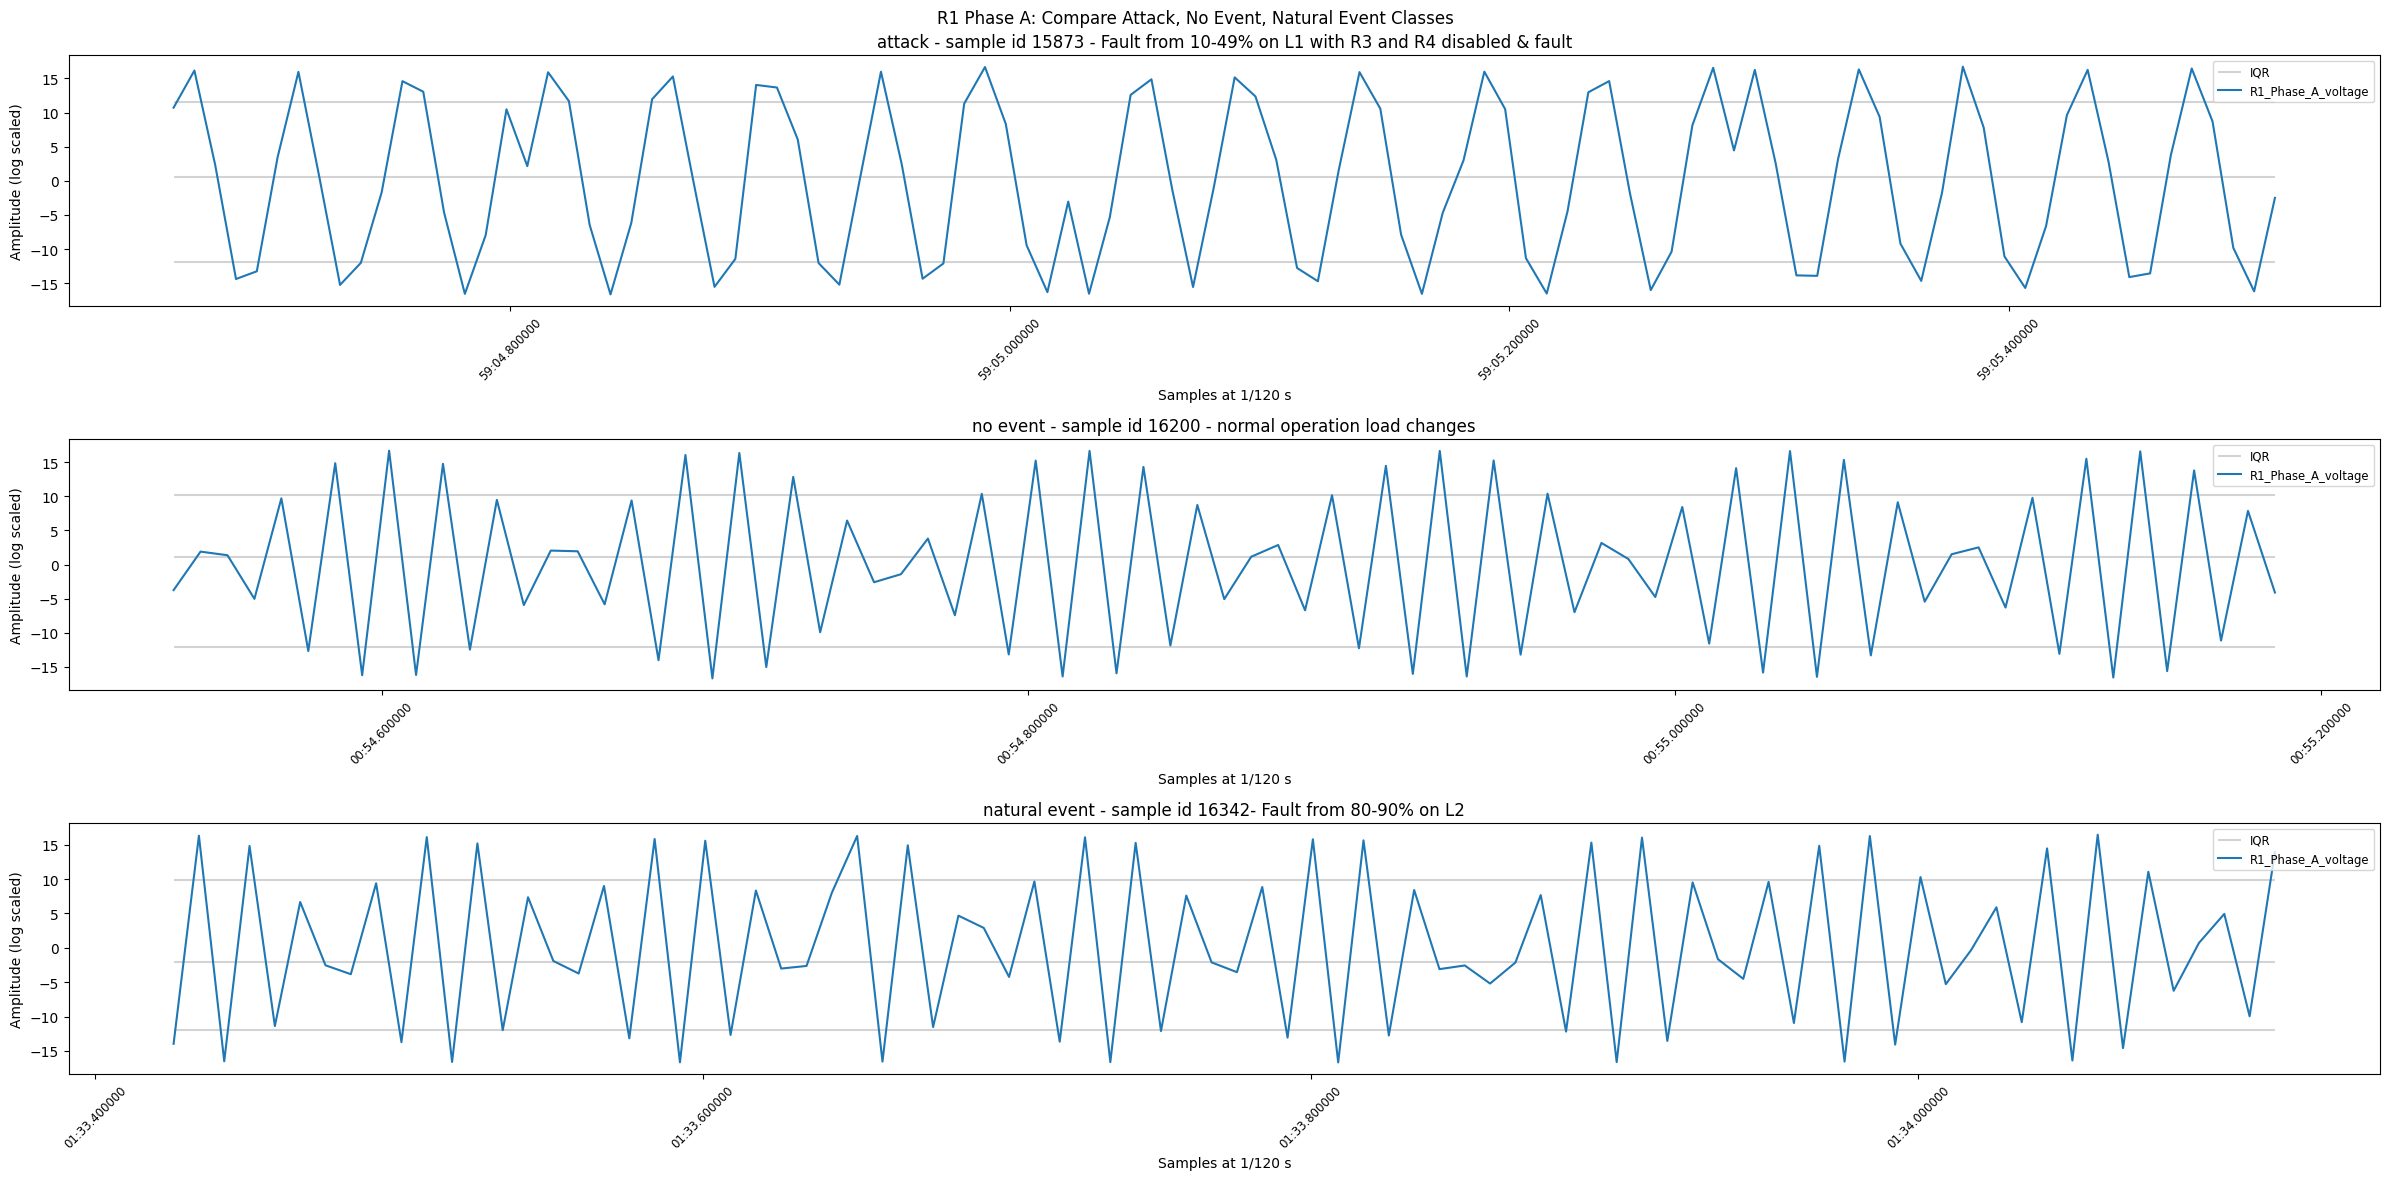

In [24]:
# V
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        if 'voltage' in col.lower():
            desc = s.describe_wave(dff[col])
            label = re.sub(r'_wave$','',col)
            ax[i].hlines([desc['median'],desc['q25'],desc['q75']],xmin=dff['synthetic_datetime'].min(), xmax=dff['synthetic_datetime'].max(),colors='lightgrey',label='IQR')
            ax[i].plot(dff['synthetic_datetime'],dff[col],label=label)
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

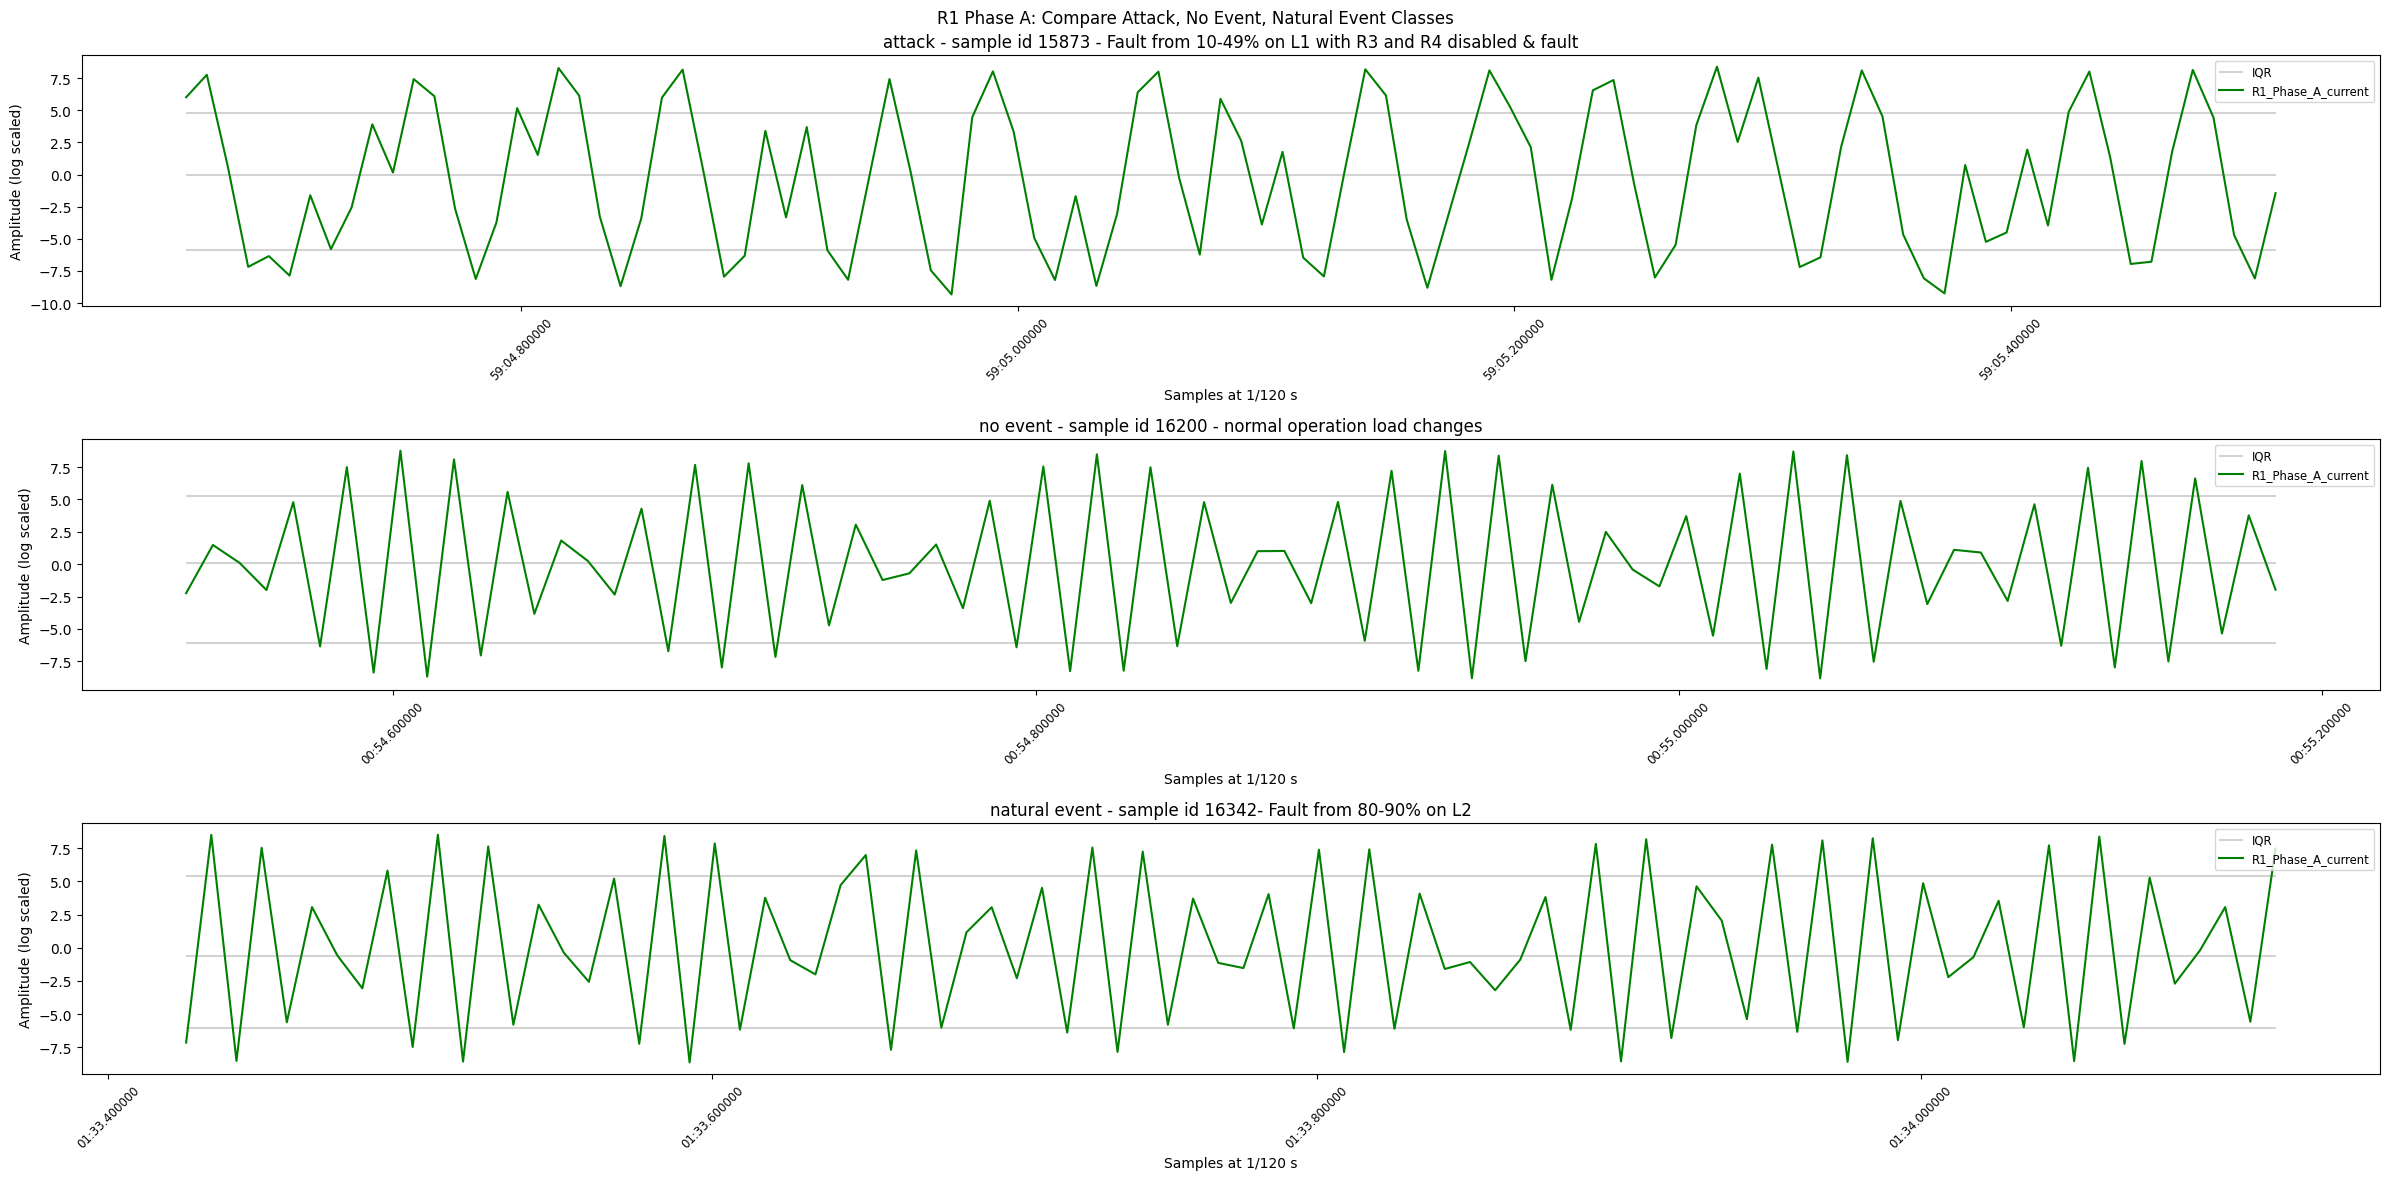

In [25]:
# V
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        if 'current' in col.lower():
            desc = s.describe_wave(dff[col])
            label = re.sub(r'_wave$','',col)
            ax[i].hlines([desc['median'],desc['q25'],desc['q75']],xmin=dff['synthetic_datetime'].min(), xmax=dff['synthetic_datetime'].max(),colors='lightgrey',label='IQR')
            ax[i].plot(dff['synthetic_datetime'],dff[col],label=label,color='g')
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

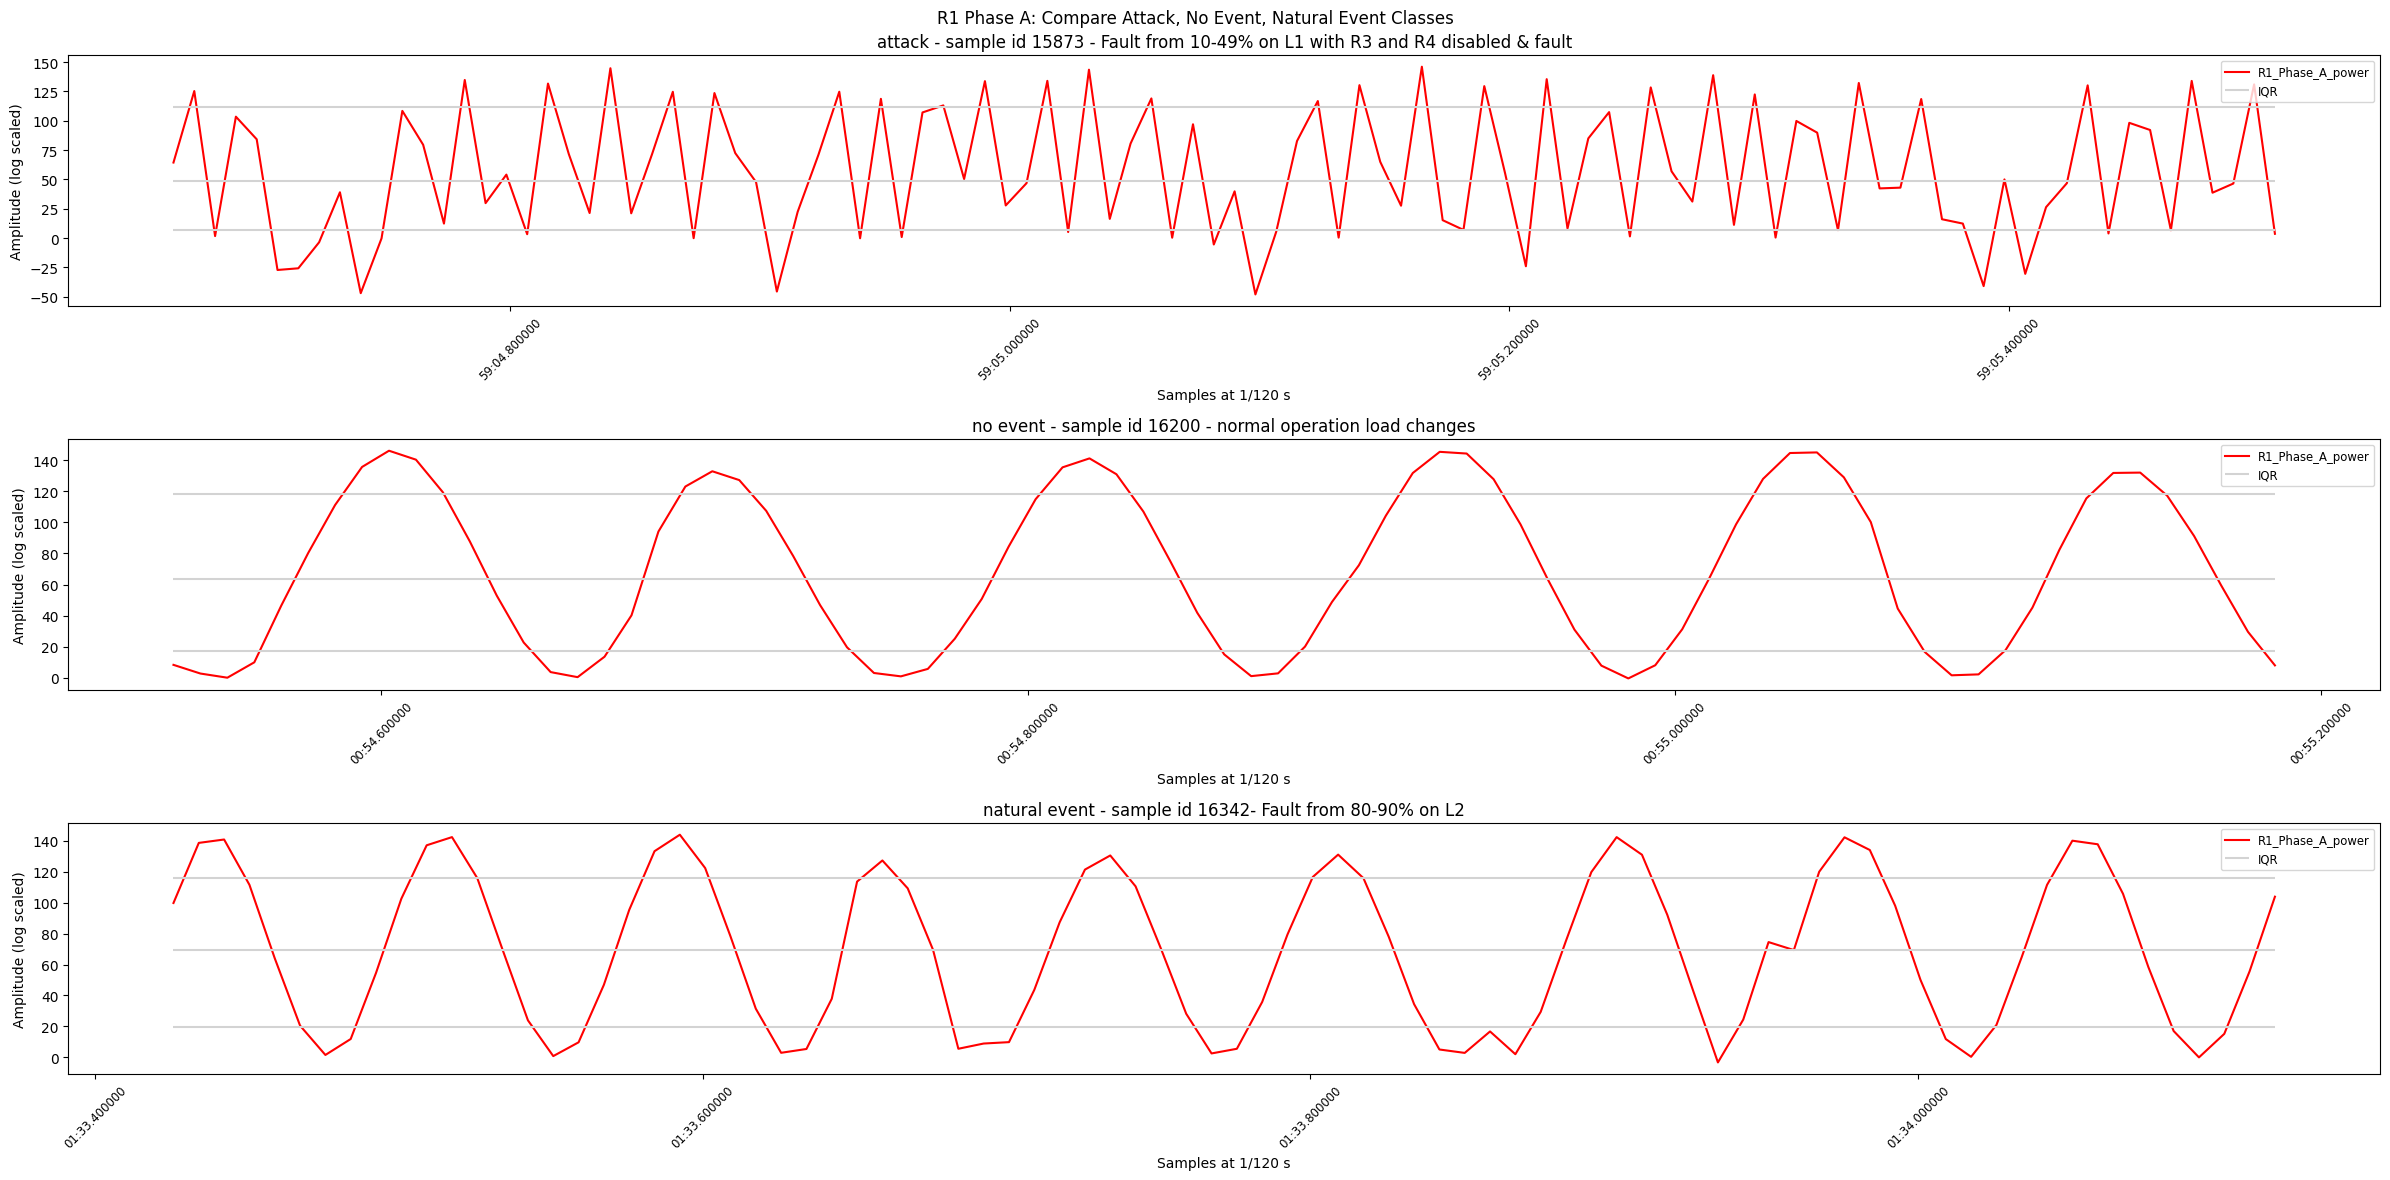

In [26]:
# P
fig, ax = plt.subplots(len(class_dfs),1, figsize=(8*len(class_dfs), 12))

for i in range(len(class_dfs)):
    dff = class_dfs[i]
    for col in R1_A_cols:
        if 'power' in col.lower() and 'avg_power':
            if 'avg_power'in col.lower():
                ax[i].plot(dff[col],label=col,color='b')
            else:
                desc = s.describe_wave(dff[col])
                label = re.sub(r'_wave$','',col)
                ax[i].plot(dff['synthetic_datetime'],dff[col],label=label,color='r')
                ax[i].hlines([desc['median'],desc['q25'],desc['q75']],xmin=dff['synthetic_datetime'].min(), xmax=dff['synthetic_datetime'].max(),colors='lightgrey',label='IQR')
            ax[i].set_ylabel('Amplitude (log scaled)')
            ax[i].set_xlabel('Samples at 1/120 s')
            ax[i].tick_params(axis='x', labelrotation=45, labelsize='small')
            ax[i].set_title(class_names[i])
            ax[i].legend(loc='upper right',fontsize='small')

plt.suptitle(title)
plt.tight_layout()
plt.show()

# Signal Descriptive EDA: Amplitude

### Voltage

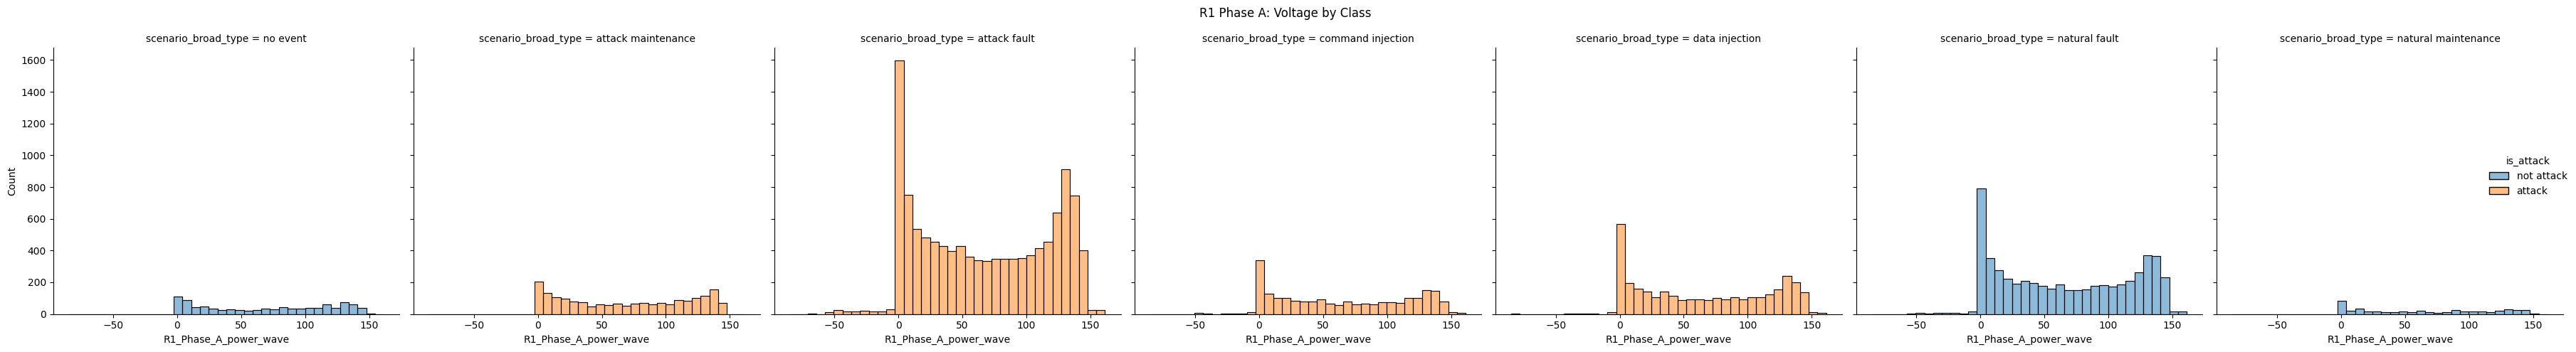

In [27]:
# plot amplitude by class
title = 'R1 Phase A: Voltage by Class'
g = sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


### Current

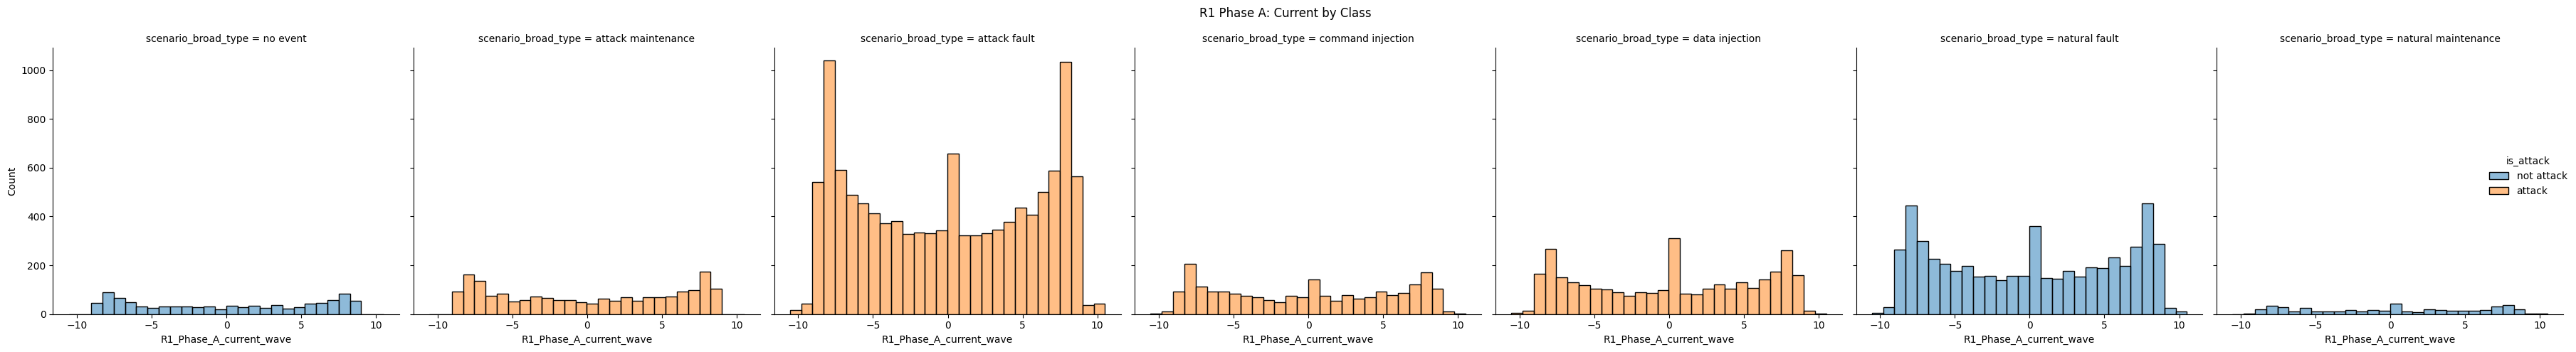

In [28]:
# plot amplitude by class
title = 'R1 Phase A: Current by Class'
g = sns.displot(wave_df, x='R1_Phase_A_current_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


### Power

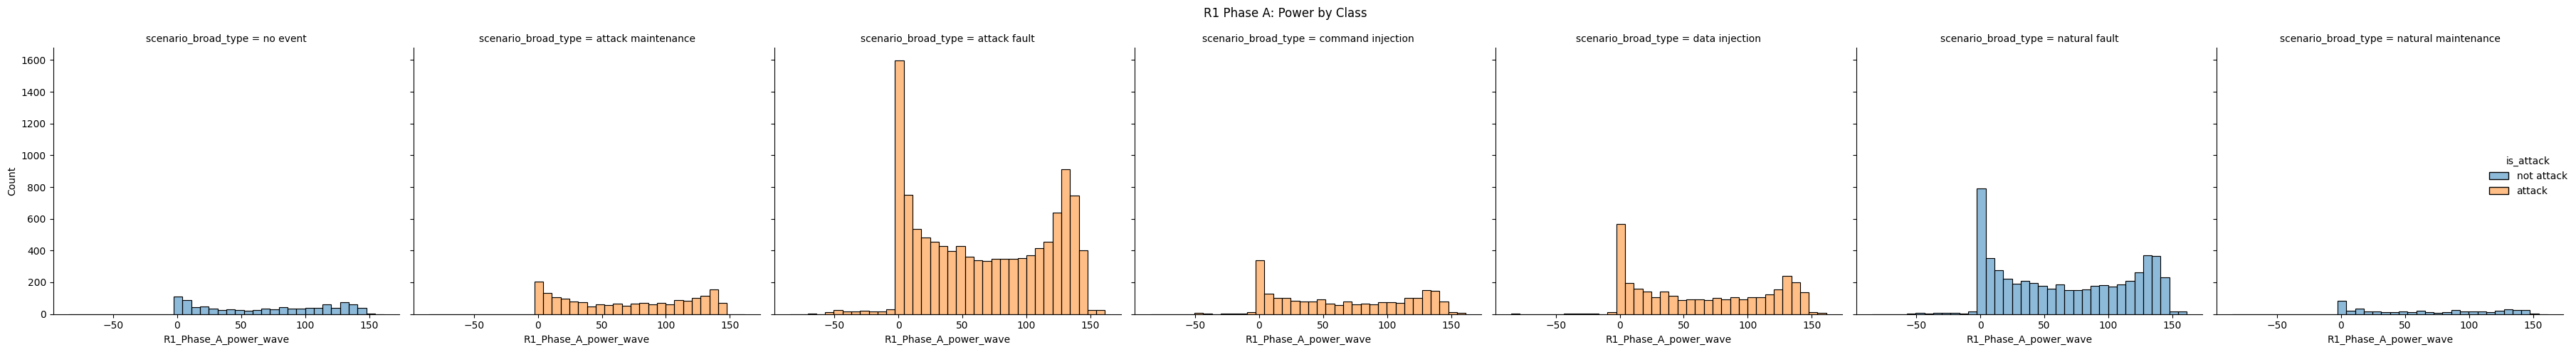

In [29]:
# plot amplitude by class
title = 'R1 Phase A: Power by Class'
g = sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_broad_type', hue='is_attack')
plt.suptitle(title)
plt.tight_layout()
plt.show()


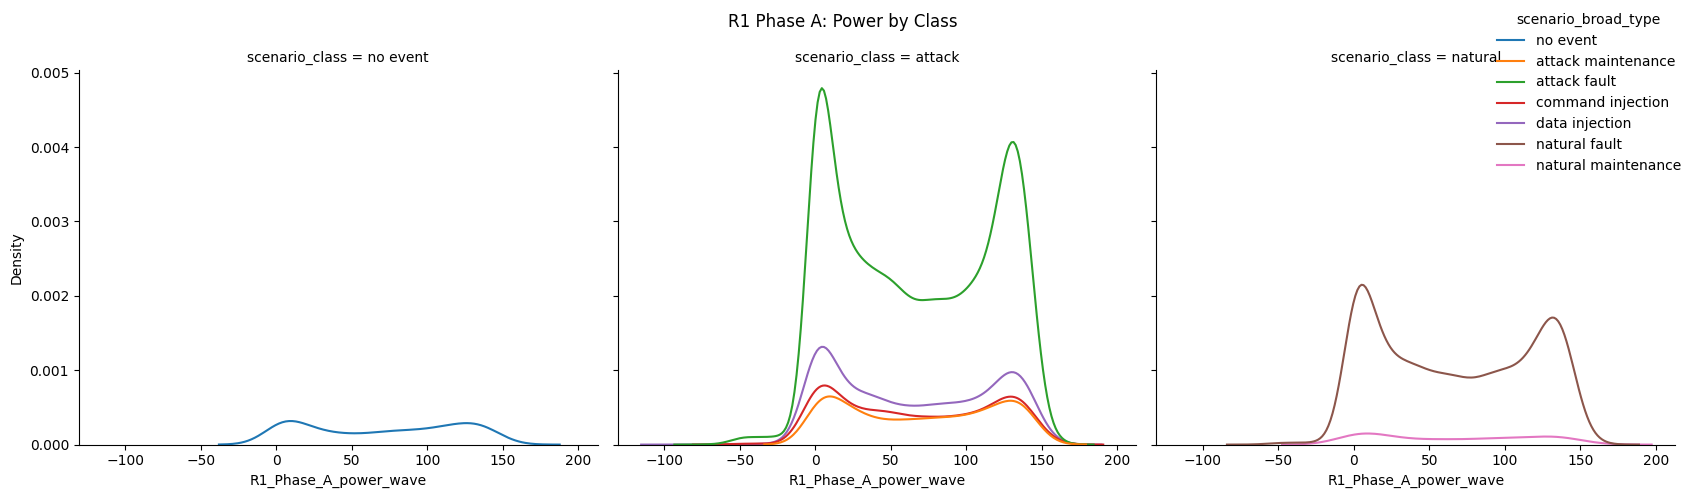

In [30]:
# plot amplitude by class
title = 'R1 Phase A: Power by Class'
g = sns.displot(wave_df, x='R1_Phase_A_power_wave', col='scenario_class', hue='scenario_broad_type', kind='kde')
sns.move_legend(g, loc='upper right')
plt.suptitle(title)
plt.tight_layout()
plt.show()


### Voltage vs Current by Class

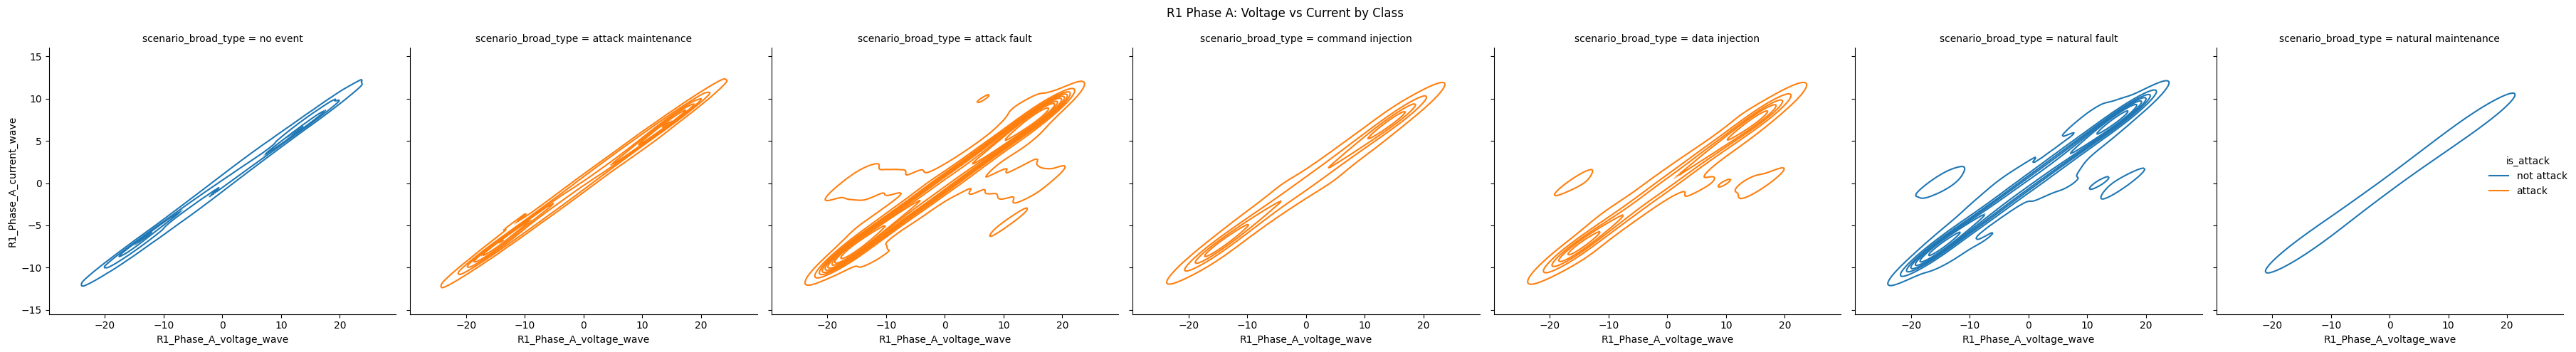

In [31]:
title = 'R1 Phase A: Voltage vs Current by Class'

sns.displot(wave_df, x='R1_Phase_A_voltage_wave', y='R1_Phase_A_current_wave', col='scenario_broad_type', hue='is_attack', kind='kde')
plt.suptitle(title)
plt.tight_layout()
plt.show()


# Signal EDA: Classes

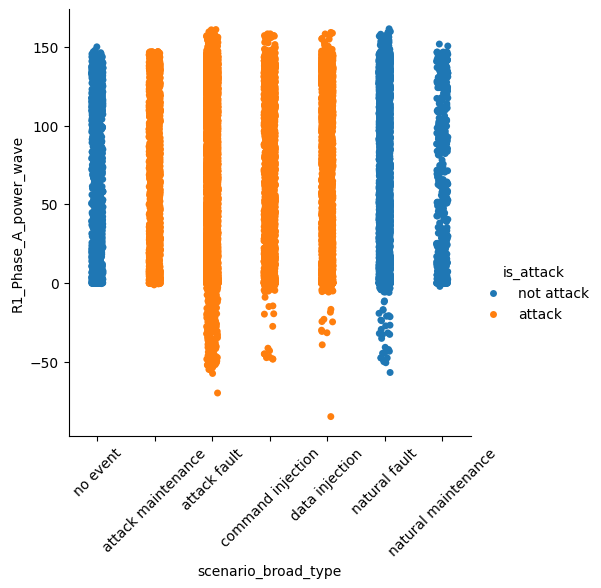

In [44]:
# amplitude by class
g = sns.catplot(data=wave_df, x="scenario_broad_type", y="R1_Phase_A_power_wave", hue='is_attack')
g.set_xticklabels(rotation=45)

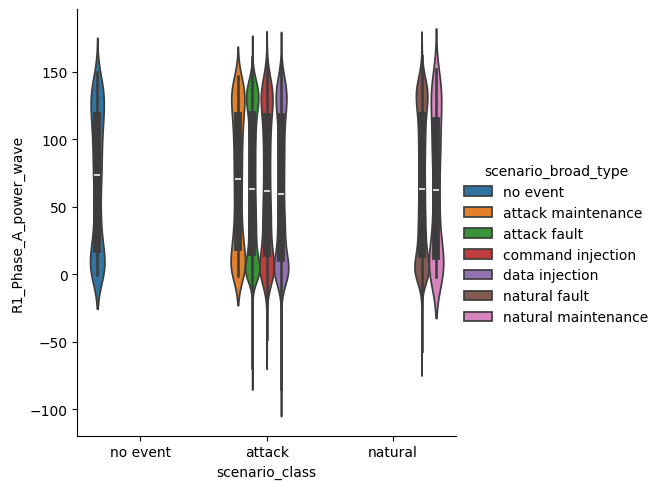

In [36]:
sns.catplot(wave_df, x="scenario_class", y="R1_Phase_A_power_wave", kind='violin', hue='scenario_broad_type')

# Correlation
Examine cross correlation for feature reduction and early insights on target correlation.

Target Correlation
* hardly any correlation to target class features

Cross Correlation
* Impedance strongly correlated with power and certain log entries, and may be dropped.
* Measures from sensors (R1, R2) and (R3, R4) of the same phase are strongly correlated respectively because each pair of sensors are taking similar readings on the same line (L1, L2)
* Measures of A, B, C phases are inversely correlated because they are intended to be multiplied to create different power combinations.
* I, V, P have strong relationships because of their mathematical relationship.
* Log/status columns: of all the status/log columns, only the relayN logs appear to have any meaningful correlation to the measures. so snort log, control panel log, etc can be removed
* pos/neg zero phase voltage, power, current is fully correlated with the primary measures


In [37]:

corr_df = wave_df.drop(columns = dp.magnitudes + dp.frequencies + dp.angles) # these values can be dropped since we have the waveform

# deal with numerics
corr_df['is_attack'] = corr_df['is_attack'].apply(lambda x: 1 if x == 'attack' else 0)
one_hot_scenario_classes = pd.get_dummies(corr_df['scenario_class']) # one hot encode scenario class

corr_df = pd.concat([corr_df, one_hot_scenario_classes], axis=1).select_dtypes(include=['number','boolean'])

In [38]:
corr = corr_df.corr()

In [39]:
# correlations to binary target feature 'is_attack'
corr['is_attack'].sort_values(ascending=False)[1:15]

attack                               1.000000
R4_status_flag_for_relays            0.054651
R2_Phase_A_pos_neg_zero_avg_power    0.024233
R2_Phase_A_avg_power                 0.024233
R2_status_flag_for_relays            0.024162
R1_status_flag_for_relays            0.021712
R4_Phase_C_pos_neg_zero_avg_power    0.019515
R4_Phase_C_avg_power                 0.019515
R4_Phase_B_avg_power                 0.016355
R4_Phase_B_pos_neg_zero_avg_power    0.016355
R4_Phase_C_power_wave                0.009005
R2_Phase_B_avg_power                 0.008417
R2_Phase_B_pos_neg_zero_avg_power    0.008417
R2_Phase_C_pos_neg_zero_avg_power    0.008405
Name: is_attack, dtype: float64

In [40]:
# correlations to 3-class 'scenario class' feature
corr.loc[:, one_hot_scenario_classes.columns.to_list()].sort_values(by=one_hot_scenario_classes.columns.to_list(), ascending=[False, False, False]).head(15)

attack   natural  no event
is_attack                          1.000000 -0.903898 -0.328627
attack                             1.000000 -0.903898 -0.328627
R4_status_flag_for_relays          0.054651 -0.047135 -0.022959
R2_Phase_A_avg_power               0.024233 -0.004406 -0.046599
R2_Phase_A_pos_neg_zero_avg_power  0.024233 -0.004406 -0.046599
R2_status_flag_for_relays          0.024162 -0.021840 -0.007940
R1_status_flag_for_relays          0.021712 -0.007092 -0.034808
R4_Phase_C_avg_power               0.019515 -0.041371  0.045985
R4_Phase_C_pos_neg_zero_avg_power  0.019515 -0.041371  0.045985
R4_Phase_B_avg_power               0.016355 -0.037654  0.045124
R4_Phase_B_pos_neg_zero_avg_power  0.016355 -0.037654  0.045124
R4_Phase_C_power_wave              0.009005 -0.016711  0.015965
R2_Phase_B_avg_power               0.008417  0.009533 -0.040613
R2_Phase_B_pos_neg_zero_avg_power  0.008417  0.009533 -0.040613
R2_Phase_C_avg_power               0.008405  0.009767 -0.041101

Using matplotlib backend: module://matplotlib_inline.backend_inline


<Axes: >

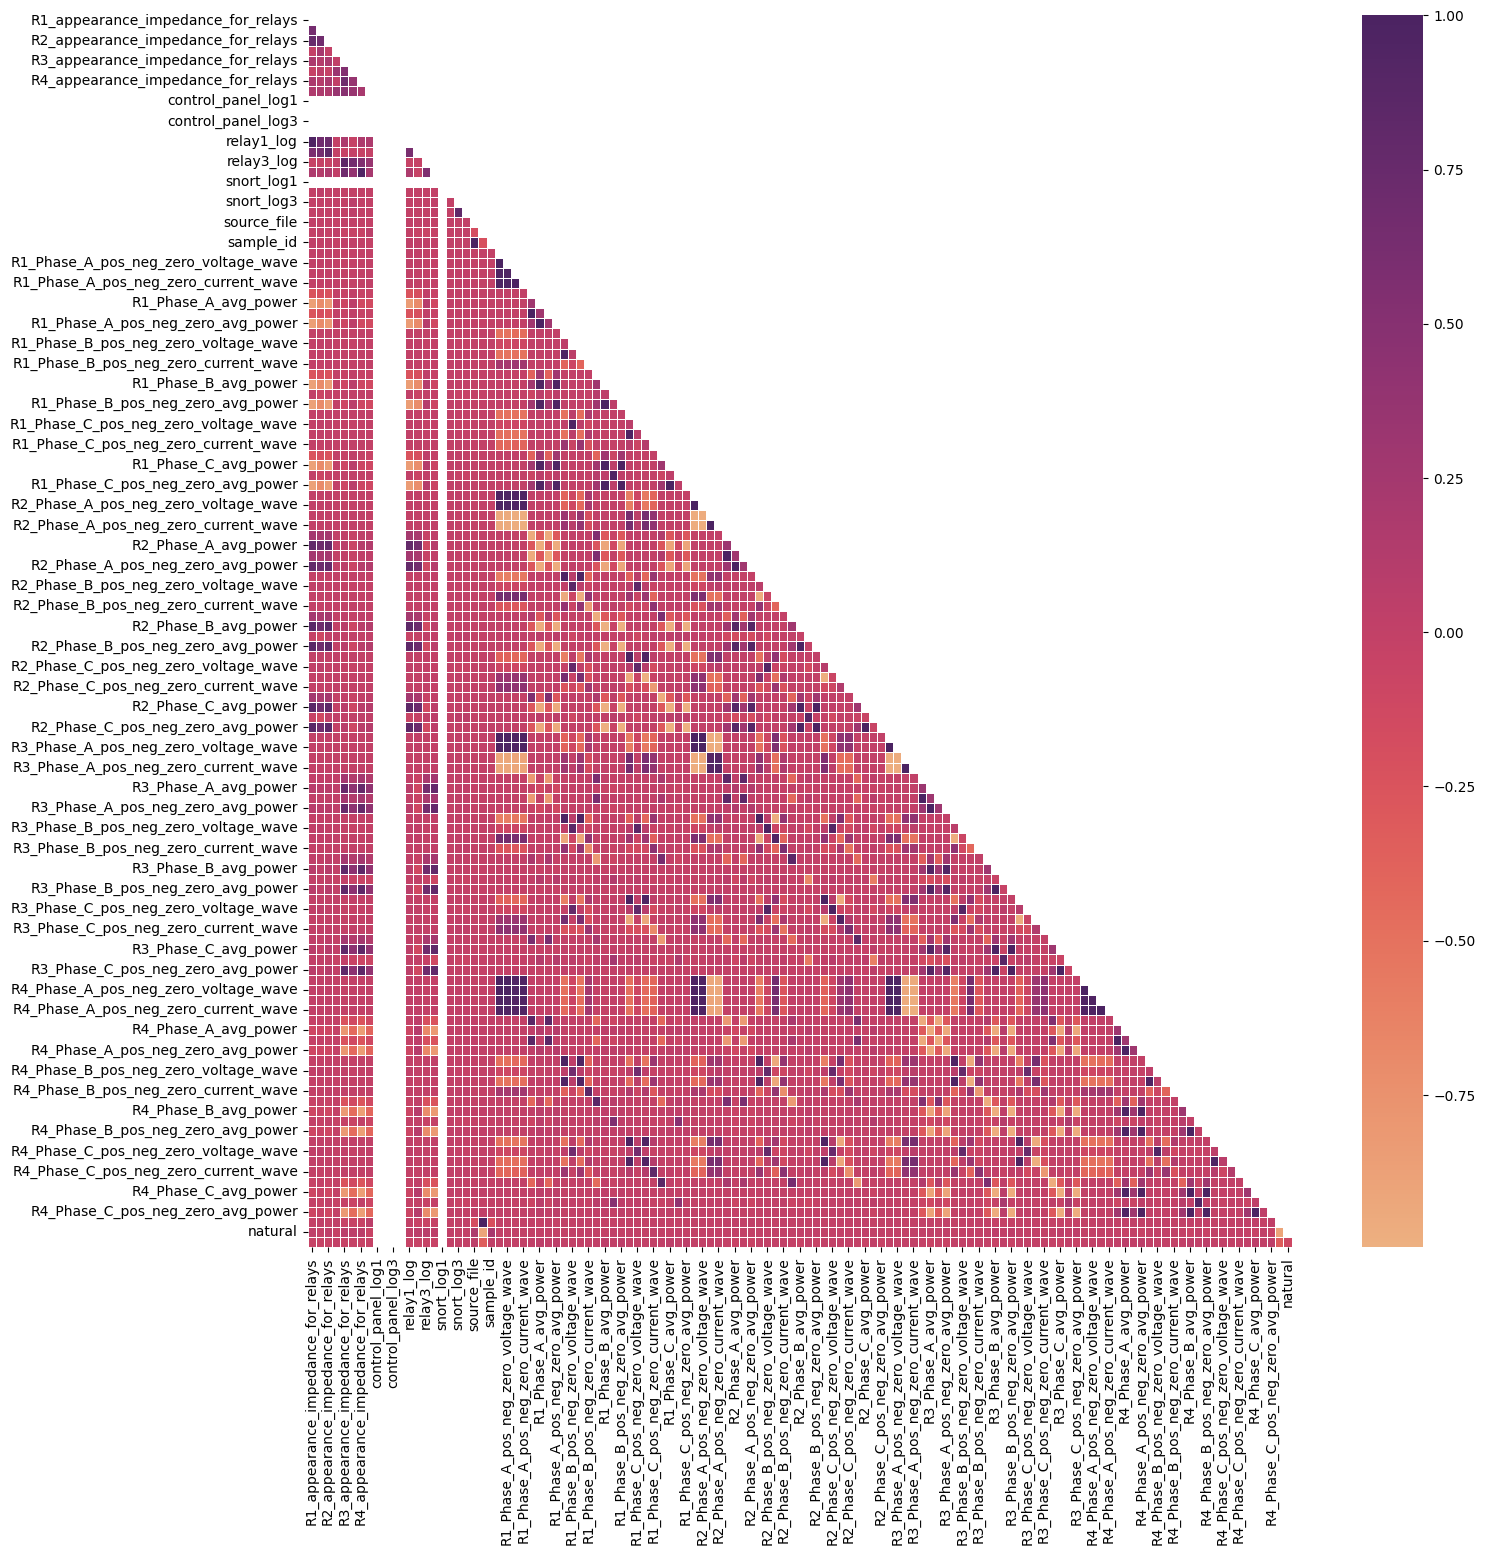

In [41]:
%matplotlib

mask = np.full_like(corr,0)
for i in range(len(mask)):
    for j in range(len(mask[0])):
        if i <= j:
            mask[i][j] = 1

plt.figure(figsize=(16, 16))
sns.heatmap(data=corr, fmt='.1f', mask=mask, linewidth=.5, cmap=sns.color_palette('flare',as_cmap=True))


In [42]:
# cross correlation - list the top ones
for col in corr.columns:
    print(col,'\n', corr[col].sort_values(ascending=False)[0:10],'\n')

R1_appearance_impedance_for_relays 
 R1_appearance_impedance_for_relays    1.000000
relay1_log                            0.956523
R2_Phase_B_pos_neg_zero_avg_power     0.874059
R2_Phase_B_avg_power                  0.874059
R2_Phase_C_pos_neg_zero_avg_power     0.872633
R2_Phase_C_avg_power                  0.872633
R2_Phase_A_pos_neg_zero_avg_power     0.800458
R2_Phase_A_avg_power                  0.800458
R2_appearance_impedance_for_relays    0.762141
R1_status_flag_for_relays             0.643263
Name: R1_appearance_impedance_for_relays, dtype: float64 

R1_status_flag_for_relays 
 R1_status_flag_for_relays             1.000000
R2_Phase_A_avg_power                  0.699182
R2_Phase_A_pos_neg_zero_avg_power     0.699182
R2_Phase_C_pos_neg_zero_avg_power     0.692108
R2_Phase_C_avg_power                  0.692108
R2_Phase_B_avg_power                  0.689949
R2_Phase_B_pos_neg_zero_avg_power     0.689949
R2_appearance_impedance_for_relays    0.686381
relay1_log                    